# Census Income

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv

# Import the needed libraries for data preprocessing, model selection, model building and evaluation

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler,PowerTransformer,QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,auc,roc_curve,r2_score,roc_auc_score
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import FactorAnalysis
from sklearn.feature_selection import chi2

# Read the dataset and print first ten records using pandas head method

In [12]:
censusdf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\census_income.csv')
censusdf.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

# Get the information about the dataset using pandas info method

In [15]:
censusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The above information shows that there are 32560 records and 15 columns in the dataset. There are no null records present in the dataset.

# Get the total rows and columns in the dataset using pandas shape method

In [20]:
censusdf.shape

(32560, 15)

# Check for the null records present in the dataset using pandas isnull method

In [23]:
censusdf.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null records present in the dataset.

# Check for the duplicate records present in the dataset using pandas duplicated method

In [27]:
censusdf.duplicated().sum()

24

There are 24 duplicate records present in the dataset.

# Display the duplicate records in the dataset

In [31]:
censusdf[censusdf.duplicated()]

Age          Workclass  Fnlwgt      Education  Education_num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366   44            Private  367749      Bachelors             13   
22493   49   Self-emp-not-inc   43479   Some-college             10   
25871   23            Private  240137        5th-6th              3   
26312   28            Private  274679        Masters             14   
28229   27            Private  255582        HS-grad              9   
28521   42            Private  204235   Some-college             10   
28845   39            Private   30916        HS-grad              9   
29156   38            Private  207202        HS-grad              9   
30844   46            Private  133616   Some-college             10   
31992   19            Private  251579   Some-college             10   
32403   35            Private  379959        HS-grad              9   

            Marital_status          Occupation    Relationship  \
4880         Never-married        Craft-repair   Not-in-family   
5103         Never-married       Other-service   Not-in-family   
9170         Never-married      Prof-specialty       Own-child   
11630        Never-married        Tech-support   Not-in-family   
13083        Never-married     Priv-house-serv   Not-in-family   
15058        Never-married     Farming-fishing   Not-in-family   
17039   Married-civ-spouse        Craft-repair         Husband   
18554        Never-married       Other-service   Not-in-family   
18697        Never-married     Farming-fishing   Not-in-family   
21317        Never-married        Adm-clerical       Own-child   
21489        Never-married     Exec-managerial       Own-child   
21874   Married-civ-spouse        Craft-repair         Husband   
22299        Never-married     Priv-house-serv   Not-in-family   
22366        Never-married      Prof-specialty   Not-in-family   
22493   Married-civ-spouse        Craft-repair         Husband   
25871        Never-married   Handlers-cleaners   Not-in-family   
26312        Never-married      Prof-specialty   Not-in-family   
28229        Never-married   Machine-op-inspct   Not-in-family   
28521   Married-civ-spouse      Prof-specialty         Husband   
28845   Married-civ-spouse        Craft-repair         Husband   
29156   Married-civ-spouse   Machine-op-inspct         Husband   
30844             Divorced        Adm-clerical       Unmarried   
31992        Never-married       Other-service       Own-child   
32403             Divorced       Other-service   Not-in-family   

                      Race      Sex  Capital_gain  Capital_loss  \
4880                 White     Male             0             0   
5103    Asian-Pac-Islander     Male             0             0   
9170                 White   Female             0             0   
11630                White   Female             0             0   
13083                White   Female             0             0   
15058                White     Male             0             0   
17039                White     Male             0             0   
18554                Black     Male         

# Drop the duplicate records in the dataset using pandas drop_duplicates method

In [34]:
censusdf.drop_duplicates(inplace=True)

In [36]:
censusdf.shape

(32536, 15)

In [38]:
censusdf.duplicated().sum()

0

# Replace the punctuations in the dataset with 'NA' using regular expression

In [41]:
censusdf["Workclass"]=censusdf["Workclass"].str.replace(r'[?]','NA',regex=True)
censusdf["Occupation"]=censusdf["Occupation"].str.replace(r'[?]','NA',regex=True)
censusdf["Native_country"]=censusdf["Native_country"].str.replace(r'[?]','NA',regex=True)

In [43]:
censusdf.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

# Relationship between the columns workclass and final weight for the income using barplot

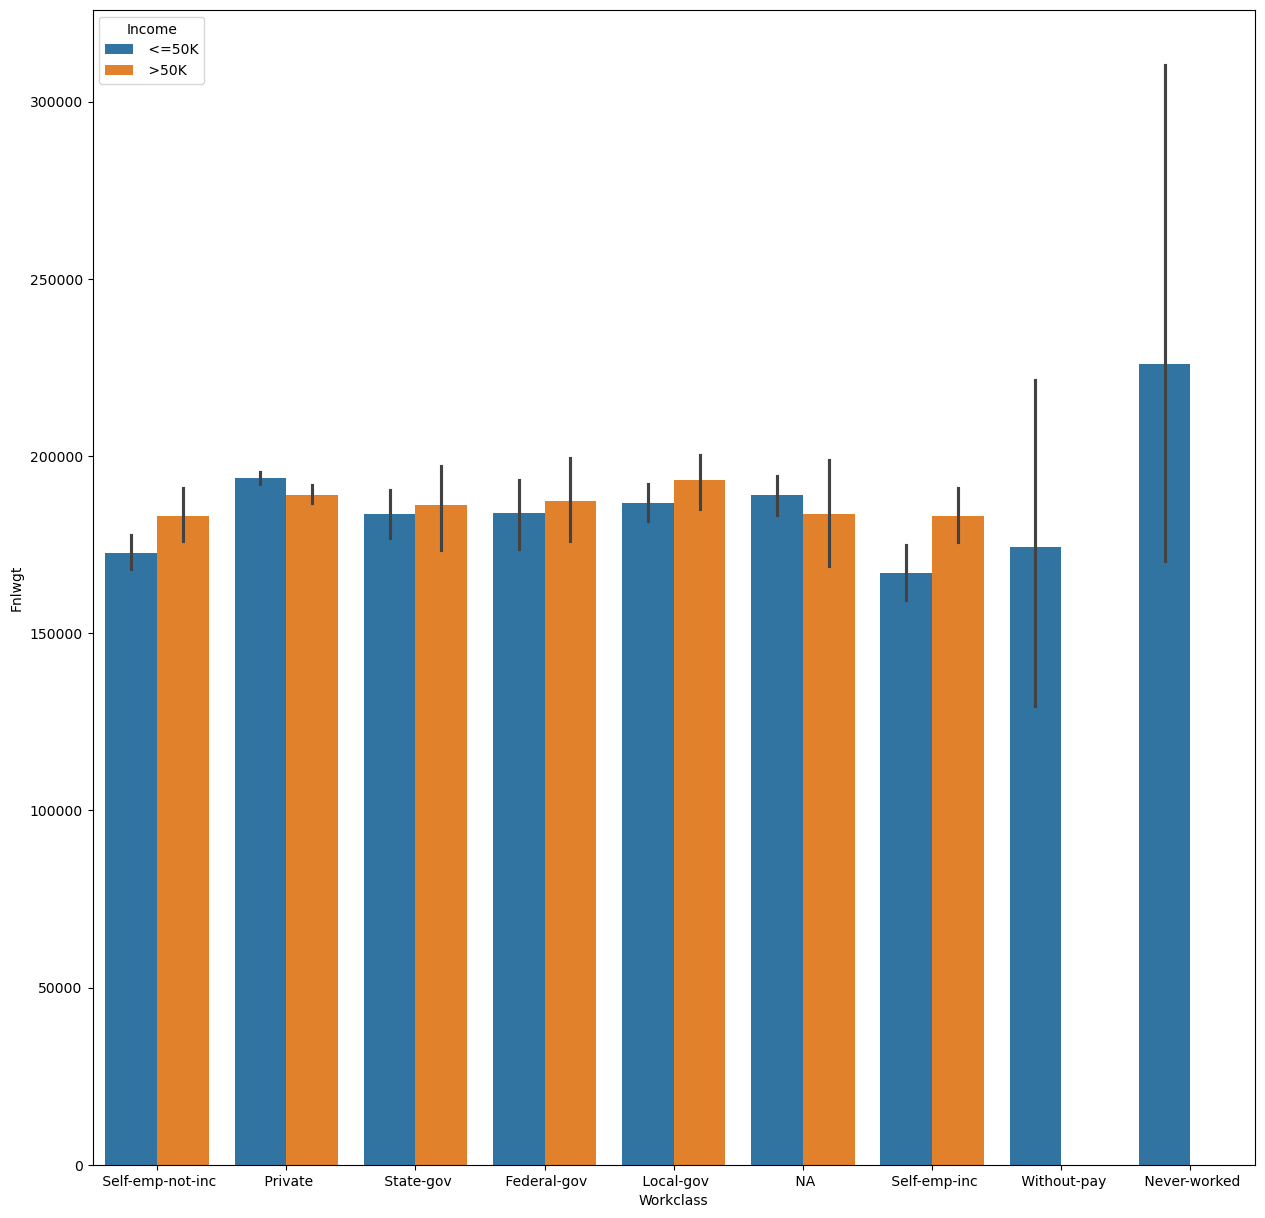

In [46]:
plt.figure(figsize=(15,15))
sns.barplot(censusdf,x='Workclass',y='Fnlwgt',hue='Income',dodge=True)
plt.show()

It is clear from the above plot that the final weight are similar for the people work in different work class except for without-pay and never-worked.

In [49]:
censusdf['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' NA', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

# Relationship between the columns Native country and final weight for the Income using barplot

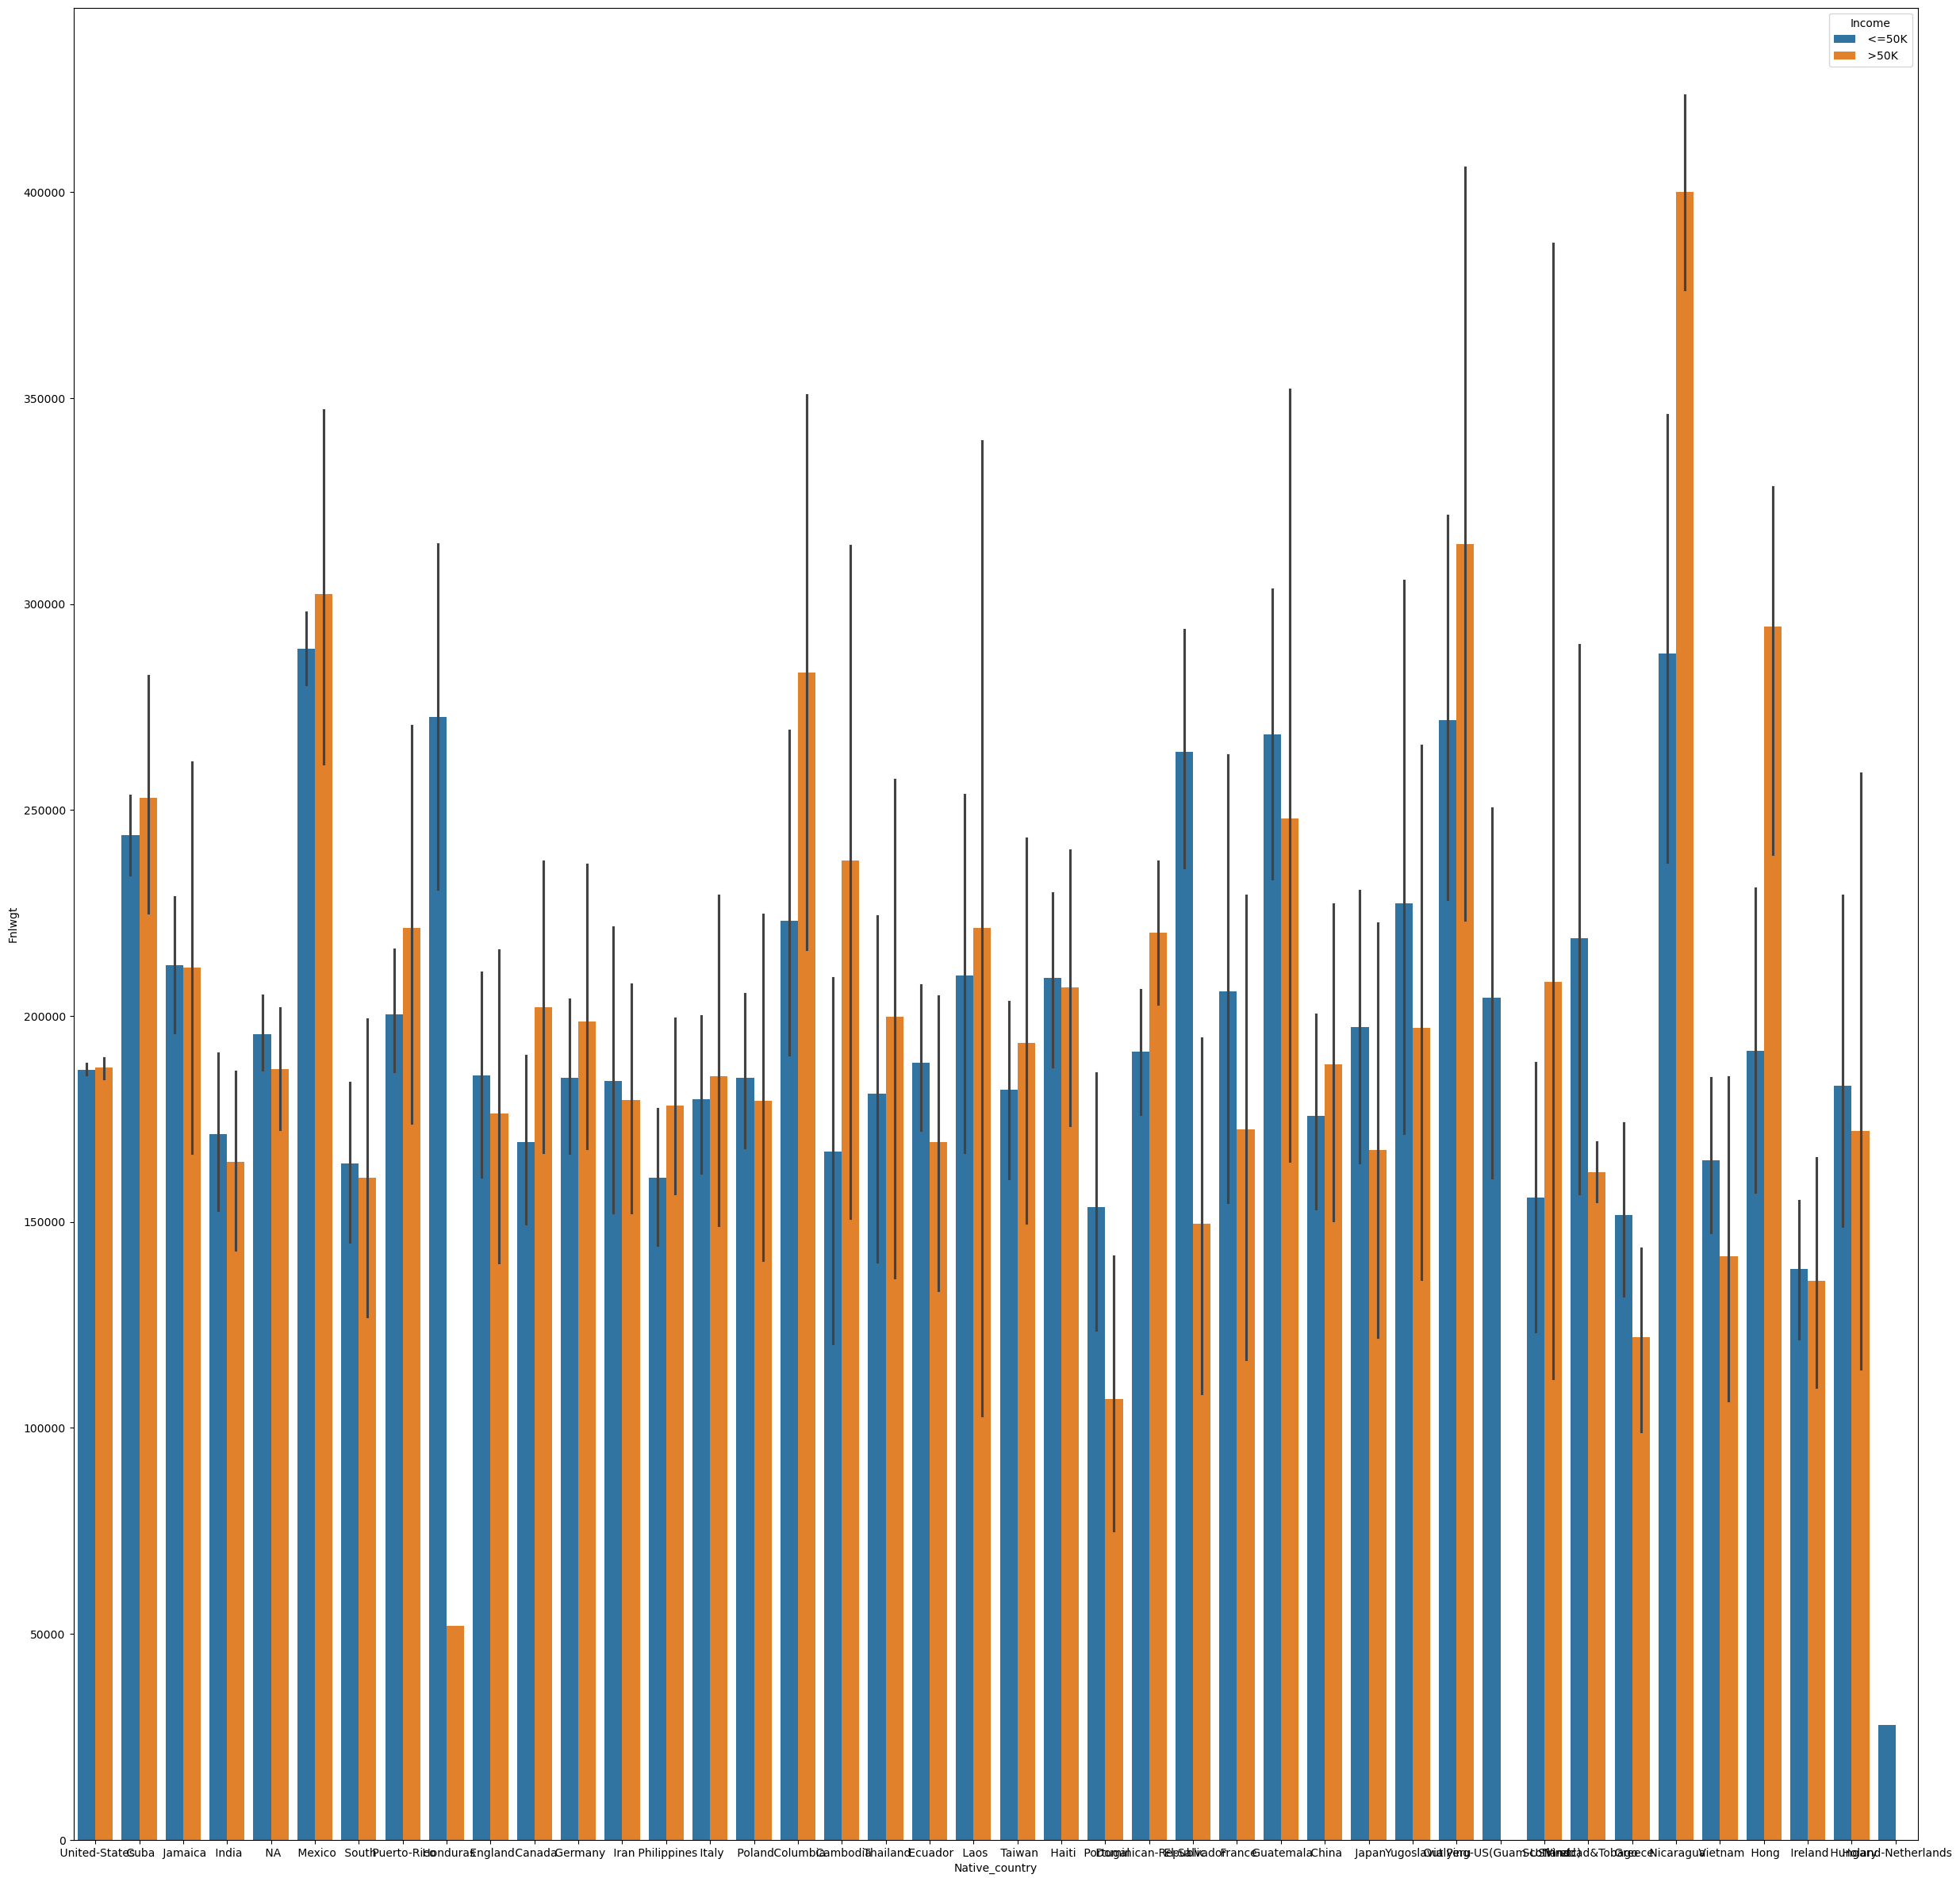

In [52]:
plt.figure(figsize=(30,30))
sns.barplot(censusdf,x='Native_country',y='Fnlwgt',hue='Income',dodge=True)
plt.show()

The above plot shows that the native countries Peru and Nicaragua have higher final weight for the census income greater than 50K.

# Relationship between the columns Race and final weight for the income and sex columns using categorical plot

<Figure size 3000x3000 with 0 Axes>

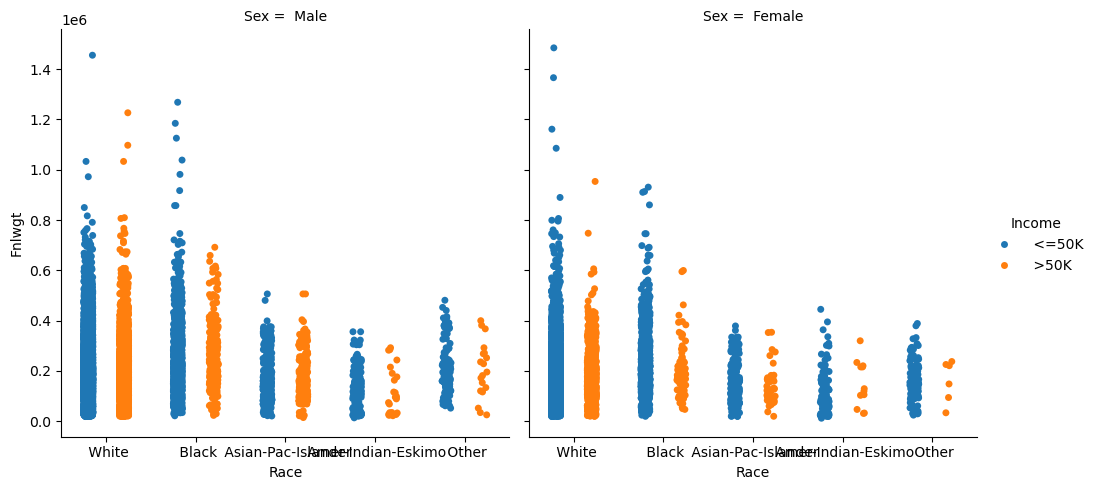

In [56]:
plt.figure(figsize=(30,30))
sns.catplot(censusdf,x='Race',y='Fnlwgt',hue='Income',col='Sex',dodge=True)
plt.show()

It is clear from the above plot that the white race male have higher final weight and income greater than 50K.

# Relationship between Age and Final weight for the income using scatterplot

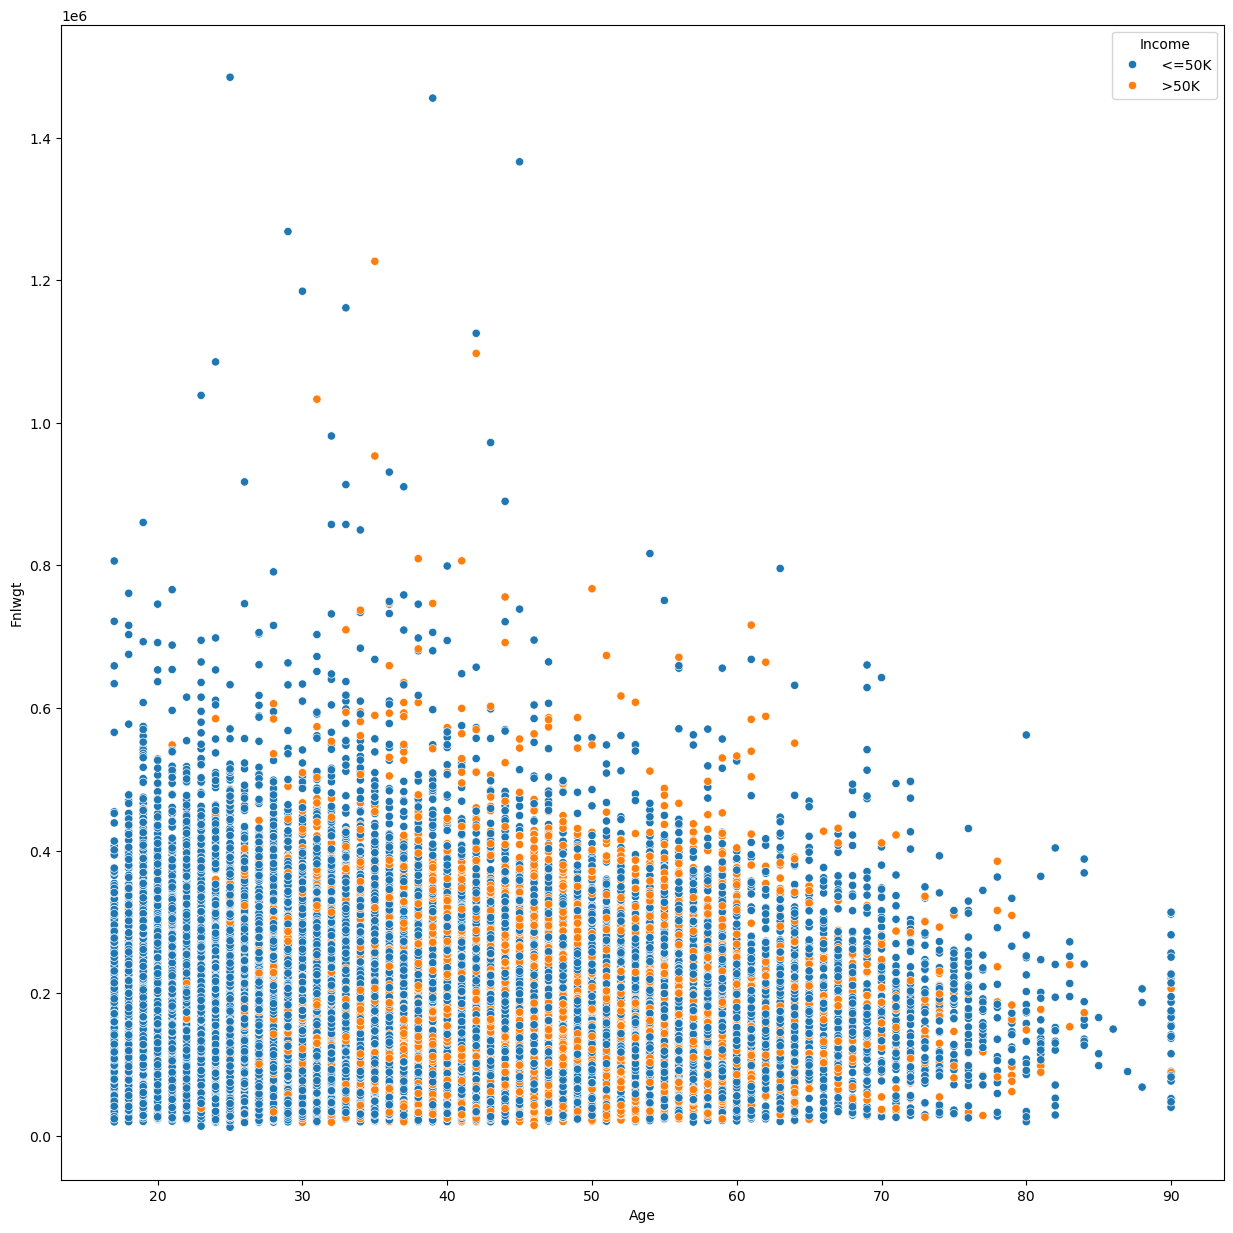

In [60]:
plt.figure(figsize=(15,15))
sns.scatterplot(censusdf,x='Age',y='Fnlwgt',hue='Income')
plt.show()

# Relationship between Education and Income using countplot

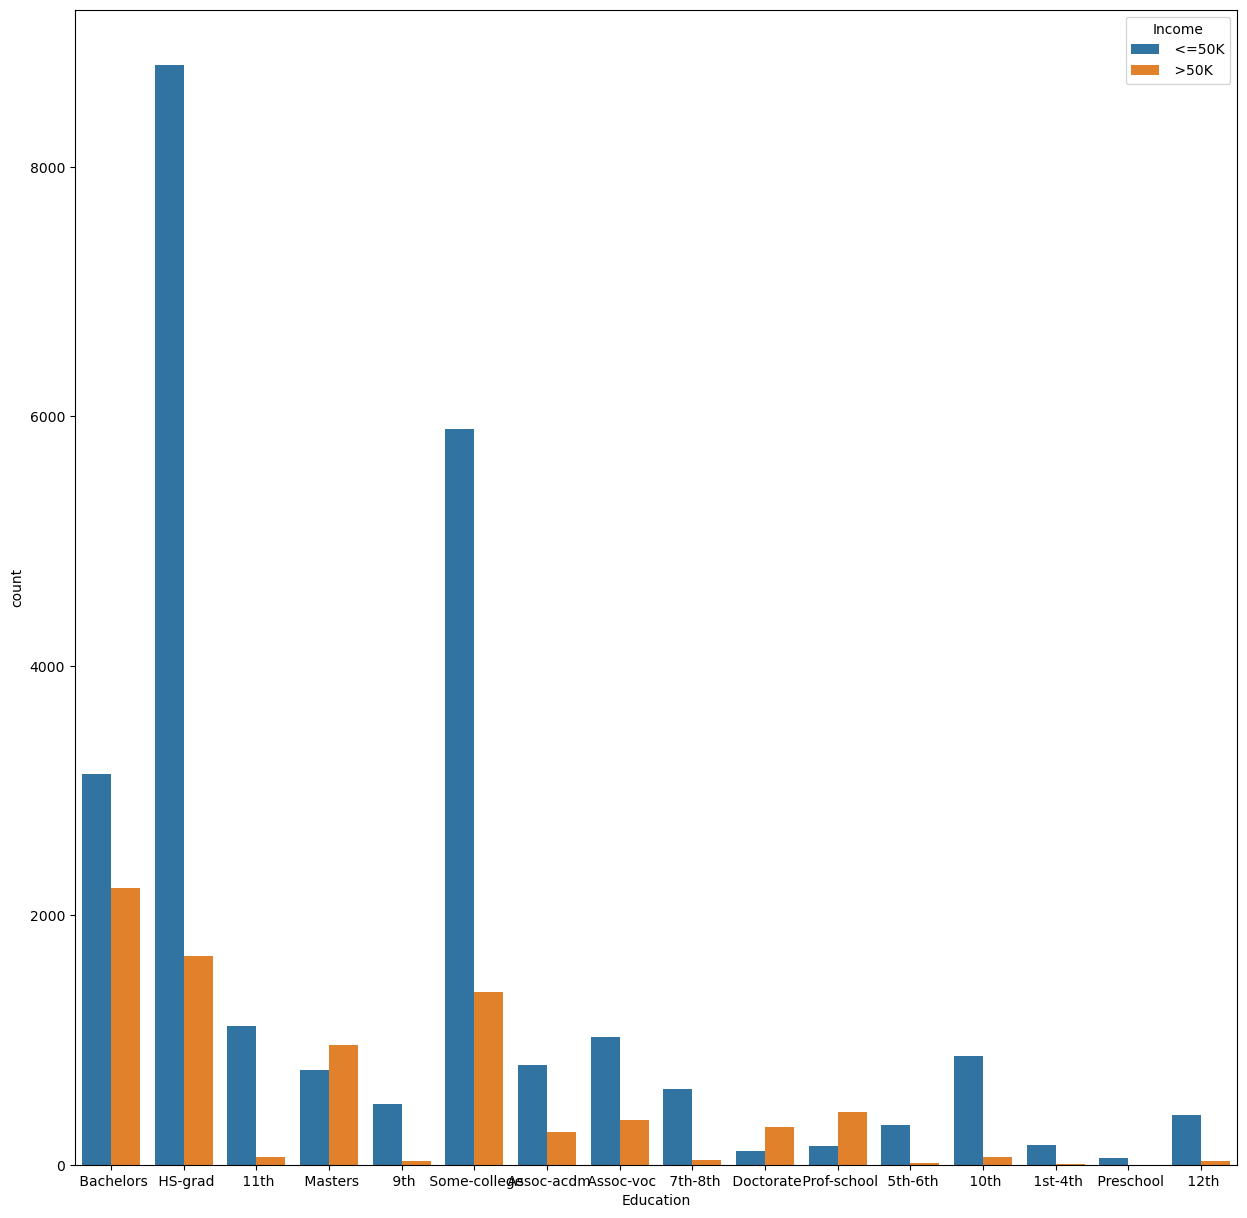

In [63]:
plt.figure(figsize=(15,15))
sns.countplot(censusdf,x='Education',hue='Income')
plt.show()

The above plot shows that the people with the bachelors degree with census income greater than 50K have a high final weight.

# Relationship between Occupation and Income using seaborn countplot

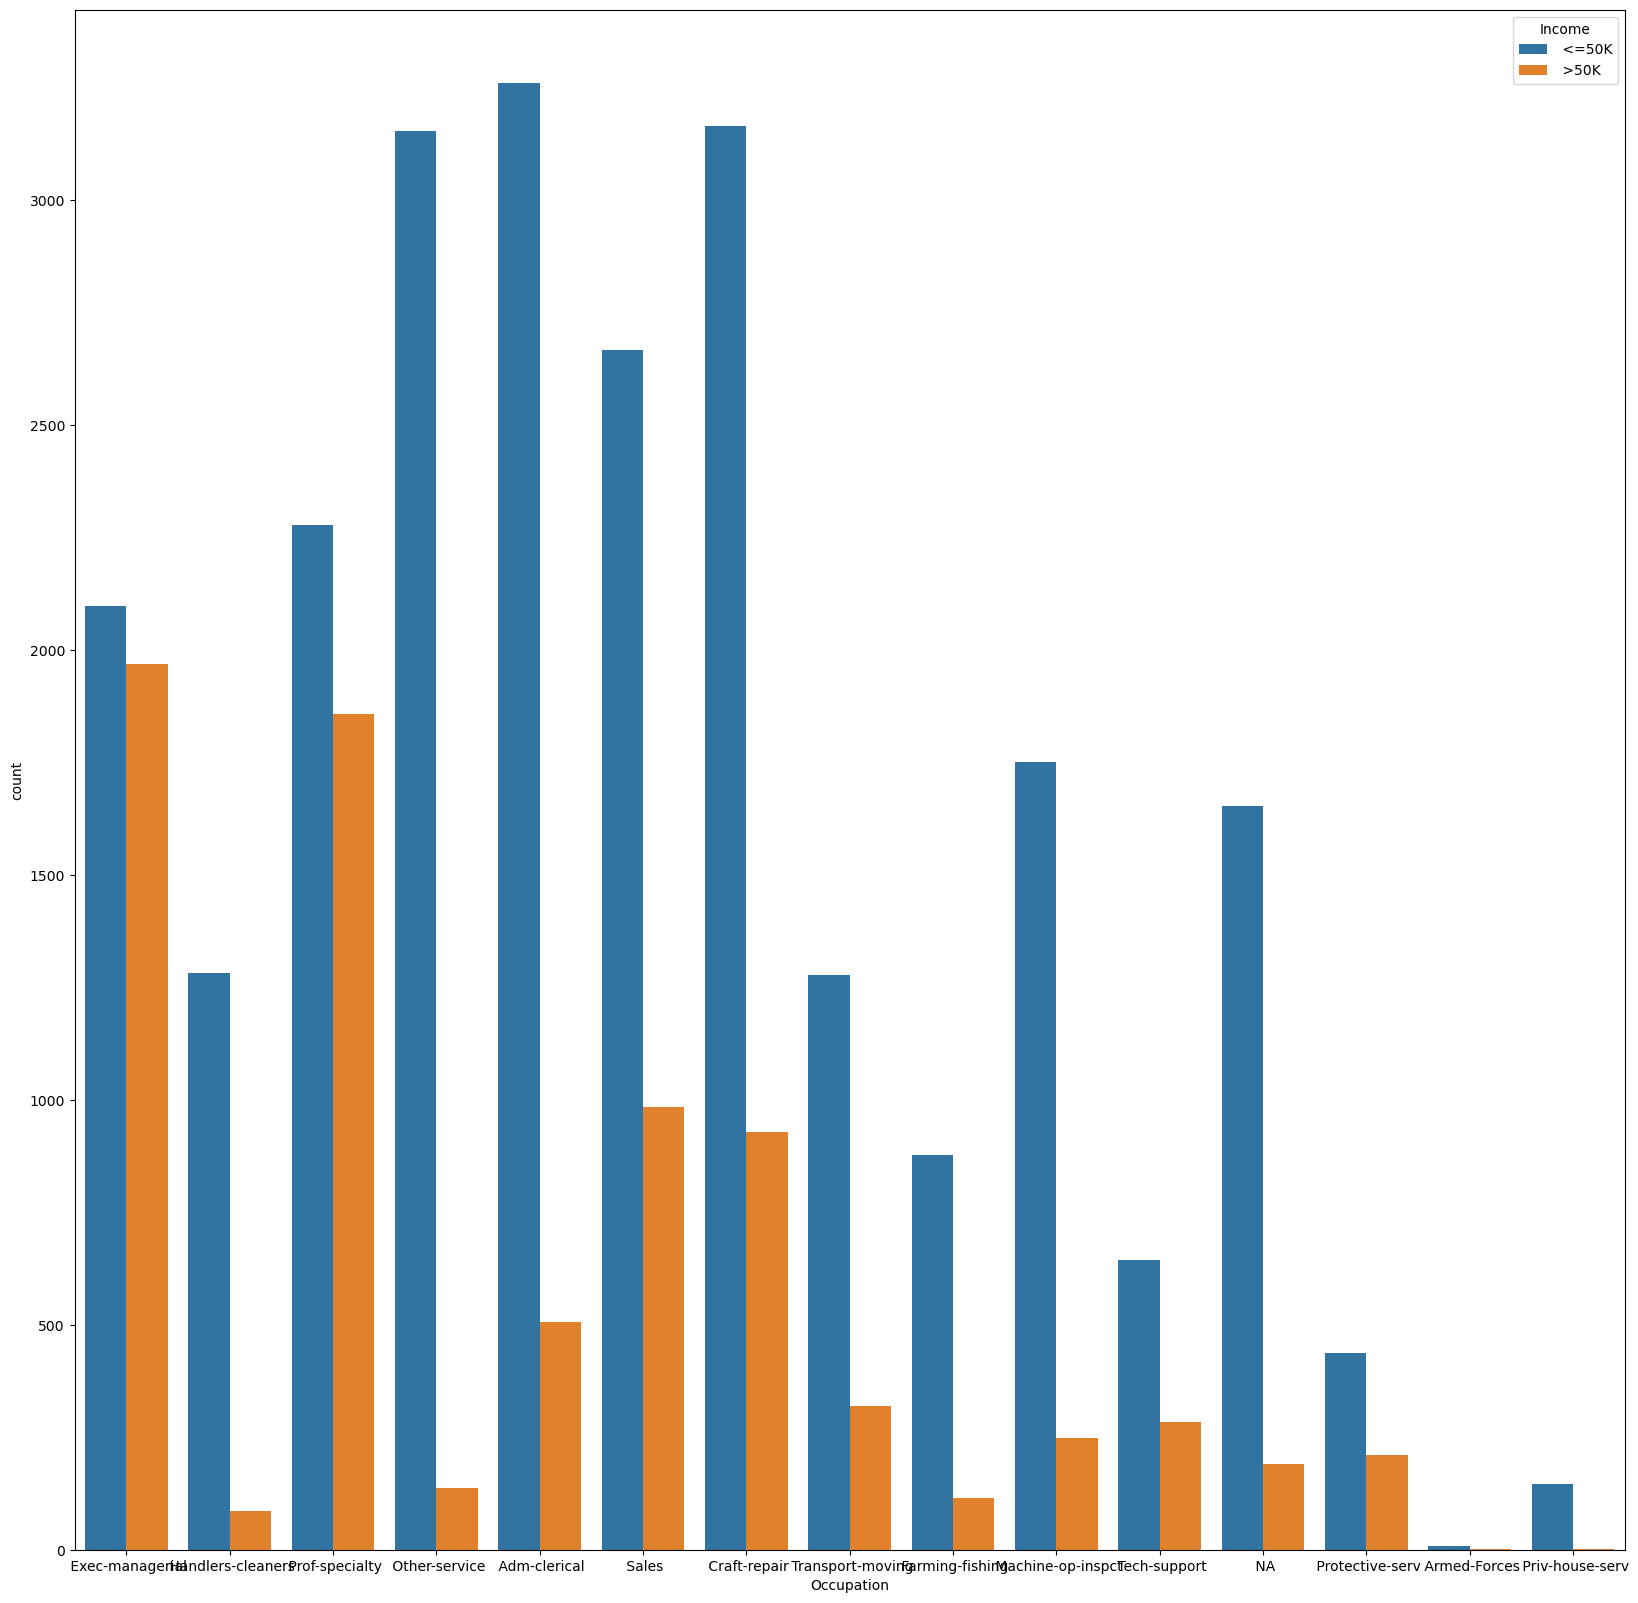

In [67]:
plt.figure(figsize=(20,20))
sns.countplot(censusdf,x='Occupation',hue='Income')
plt.show()

It is clear from the above plot that the occupation of Exec-manager with the census income greater than 50K have higher final weight.

# Relationship between capital gain and Income using scatterplot

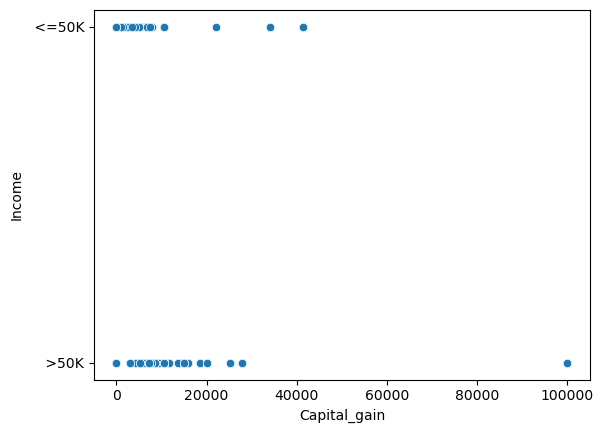

In [71]:
sns.scatterplot(censusdf,x='Capital_gain',y='Income')
plt.show()

# Relationship between capital gain and Income using scatterplot

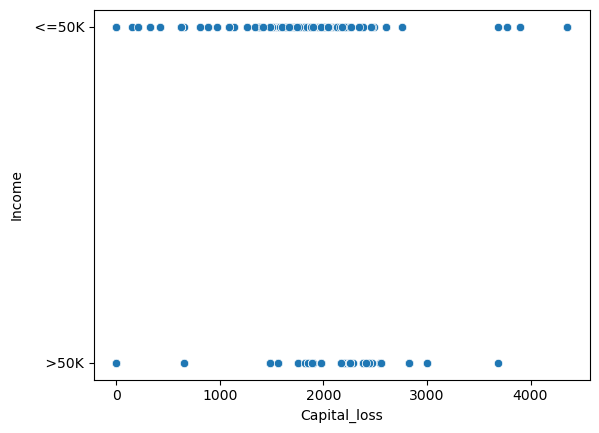

In [74]:
sns.scatterplot(censusdf,x='Capital_loss',y='Income')
plt.show()

In [76]:
censusdf['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [78]:
# Check the Income greater than 50k and assign value
census=[]
for i in censusdf["Income"]:
    if i==" <=50K":
        census.append("Low")
    elif i==" >50K":
        census.append("High")
censusdf["Income"]=census

In [80]:
censusdf['Income'].unique()

array(['Low', 'High'], dtype=object)

In [82]:
censusdf.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country Income  
0             0             0              13   United-States    Low  
1             0             0              40   United-States    Low  
2             0             0              40   United-States    Low  
3             0             0              40            Cuba    Low  
4             0             0              40   United-States    Low

# Encode the categorical columns in the dataset using sklearn LabelEncoder

In [85]:
columns_to_encode=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']
le=LabelEncoder()
censusdf[columns_to_encode]=censusdf[columns_to_encode].apply(le.fit_transform)

In [87]:
census_income={'Low':0,'High':1}
censusdf['Income']=censusdf['Income'].replace(census_income)

In [89]:
censusdf['Income'].unique()

array([0, 1], dtype=int64)

In [91]:
censusdf.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          6   83311          9             13               2   
1   38          4  215646         11              9               0   
2   53          4  234721          1              7               2   
3   28          4  338409          9             13               2   
4   37          4  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3          10             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              39       0  
1              40              39       0  
2              40              39       0  
3              40               4       0  
4              40              39       0

In [93]:
censusdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 3.0 MB


# Display the statistical summary of the dataset using pandas describe method

In [96]:
censusdf.describe()

Age     Workclass        Fnlwgt     Education  Education_num  \
count  32536.000000  32536.000000  3.253600e+04  32536.000000   32536.000000   
mean      38.585536      3.887663  1.897843e+05     10.297547      10.081725   
std       13.638193      1.405935  1.055563e+05      3.870195       2.571622   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178315e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783560e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.369932e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       Marital_status    Occupation  Relationship          Race           Sex  \
count    32536.000000  32536.000000  32536.000000  32536.000000  32536.000000   
mean         2.611384      6.468681      1.446552      3.665816      0.669228   
std          1.506304      4.343758      1.607087      0.848858      0.470498   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      6.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  \
count  32536.000000  32536.000000    32536.000000    32536.000000   
mean    1078.410069     87.370912       40.440343       37.123555   
std     7388.068465    403.107737       12.347079        6.449428   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       39.000000   
50%        0.000000      0.000000       40.000000       39.000000   
75%        0.000000      0.000000       45.000000       39.000000   
max    99999.000000   4356.000000       99.000000       41.000000   

             Income  
count  32536.000000  
mean       0.240933  
std        0.427656  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

The above statistical summary data shows:

1, The count of all the columns in the dataset are same and there are no null records present in the dataset.

2, There is less skewness present in the dataset

3, The maximum value is higher than 75th percentile and there are outliers present in the dataset.

# Correlation for different features in the dataset using pandas corr method

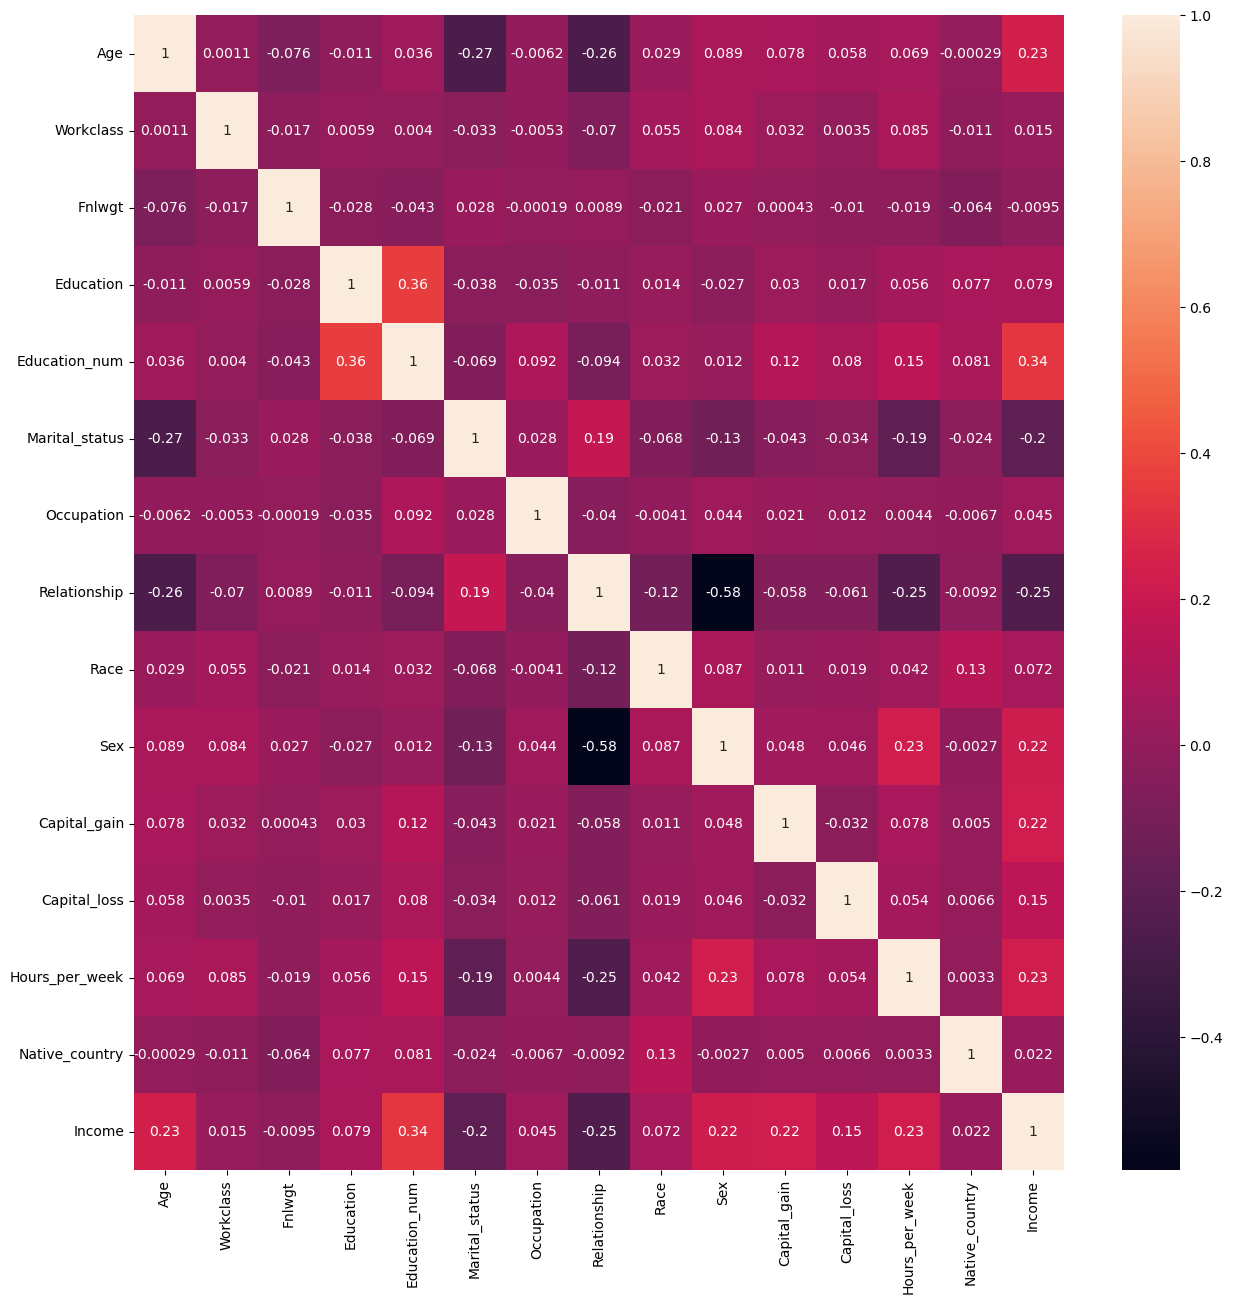

In [100]:
census_corr=censusdf.corr()
plt.figure(figsize=(15,15))
sns.heatmap(census_corr,annot=True)
plt.show()

The output from the above heatmap shows:

1, The columns marital status and relationship are negatively correlated with the column Income

2, The columns Age and Income are positively correlated with Income.

# Check for the skewness in the dataset using seaborn distplot

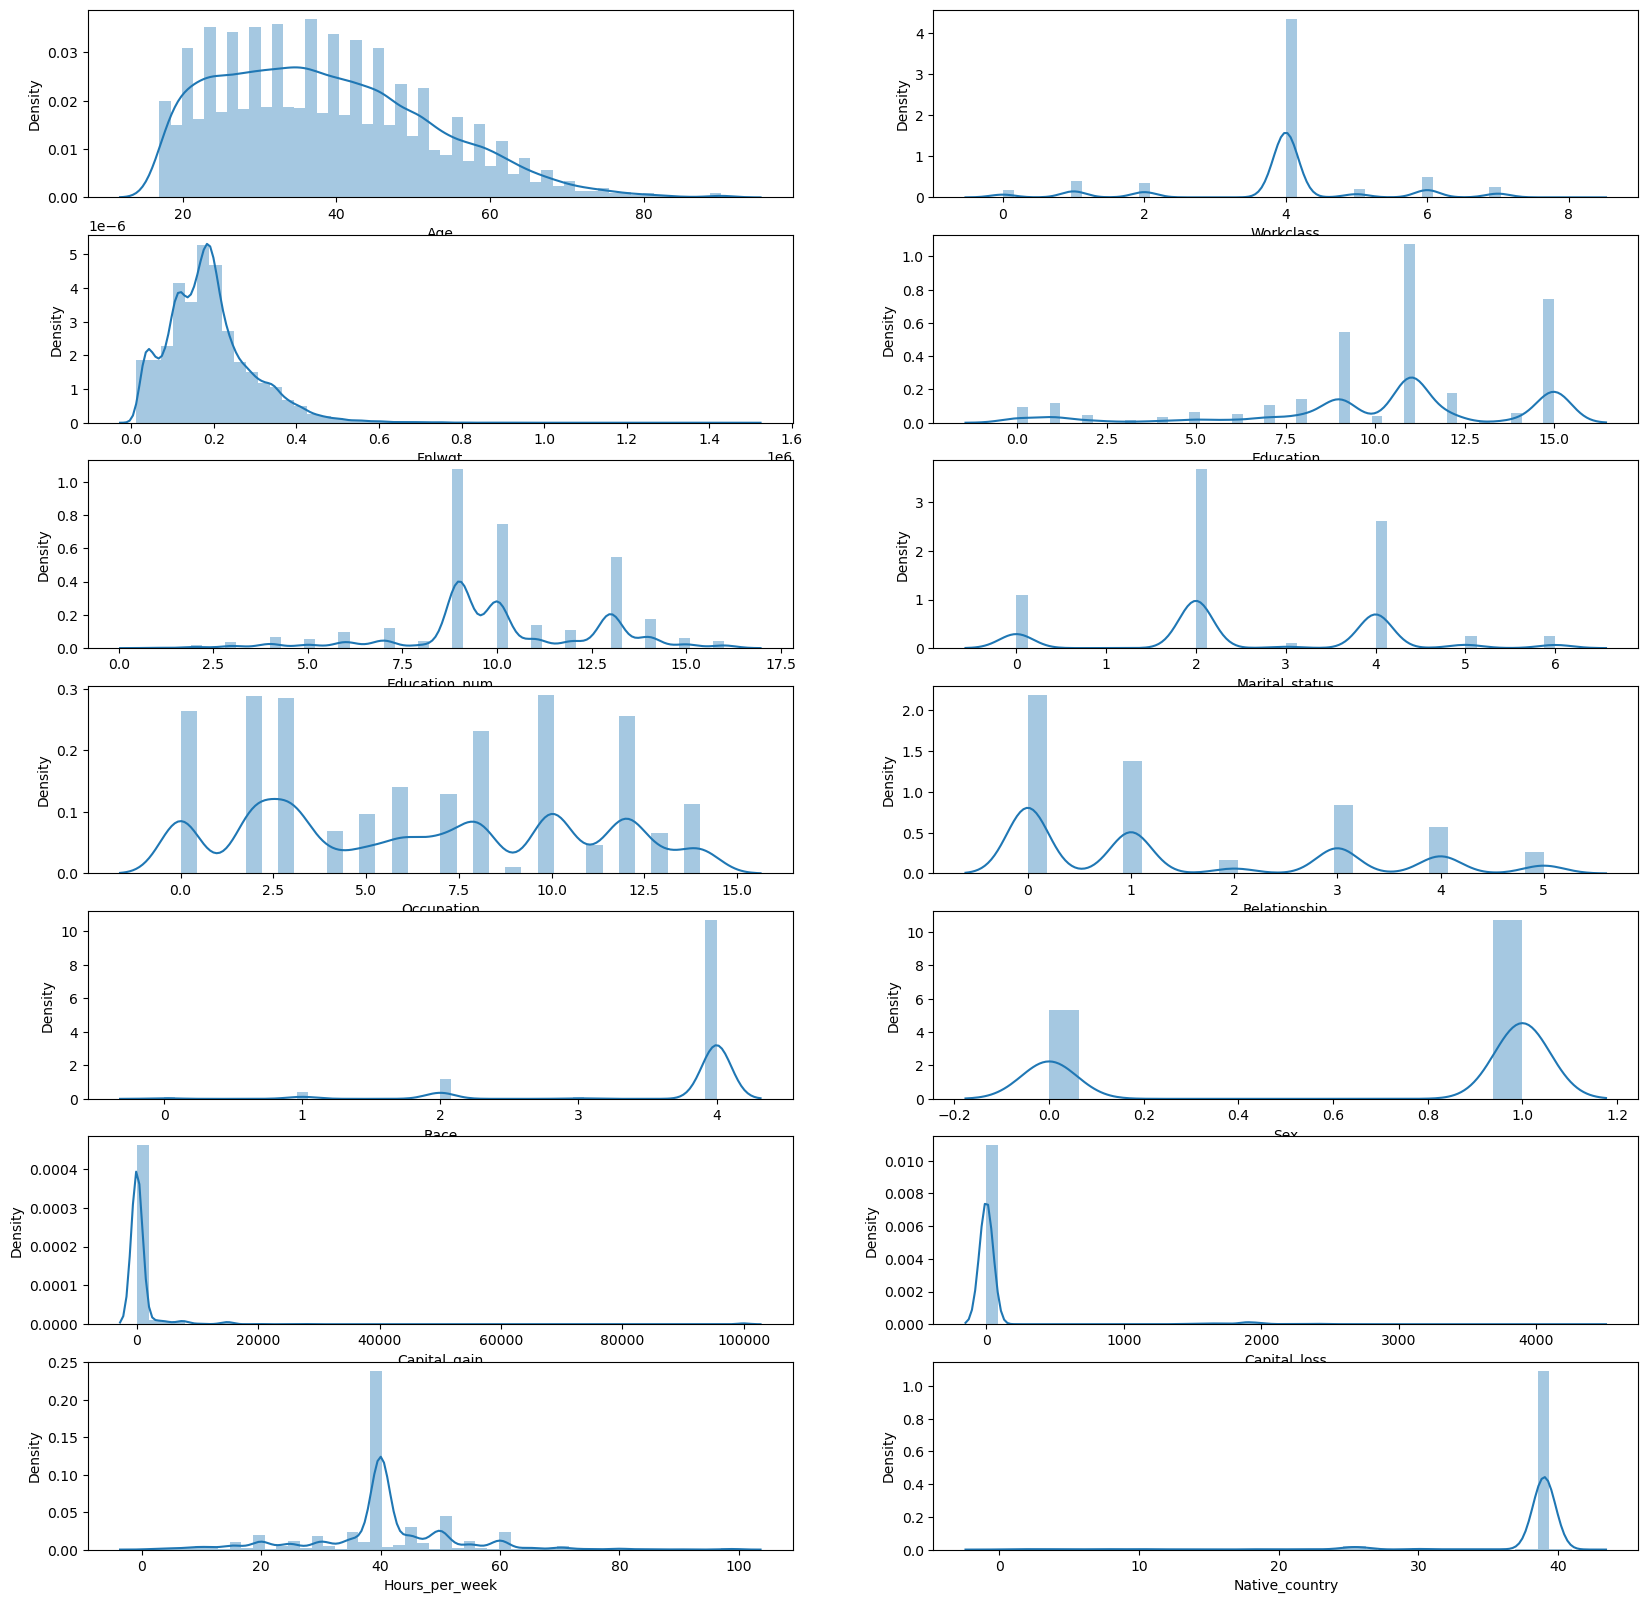

In [104]:
plt.figure(figsize=(20,20))
p=1
for i in censusdf:
    if p<=14:
        plt.subplot(7,2,p)
        sns.distplot(censusdf[i])
    p=p+1
plt.show()

# Check for the skewness in the dataset using skew method

In [107]:
censusdf.skew()

Age                0.557657
Workclass         -0.592580
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.089872
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.865497
Income             1.211640
dtype: float64

# Remove the skewness in the dataset using PowerTransformer

In [110]:
columns_to_transform=['Workclass','Fnlwgt','Education','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country']
pt=PowerTransformer()
censusdf[columns_to_transform]=pt.fit_transform(censusdf[columns_to_transform])

In [112]:
censusdf.skew()

Age               0.557657
Workclass         0.078425
Fnlwgt            0.016961
Education        -0.309379
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.089872
Relationship      0.123000
Race             -2.010646
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
Native_country   -2.645983
Income            1.211640
dtype: float64

# Skewness is removed from the dataset

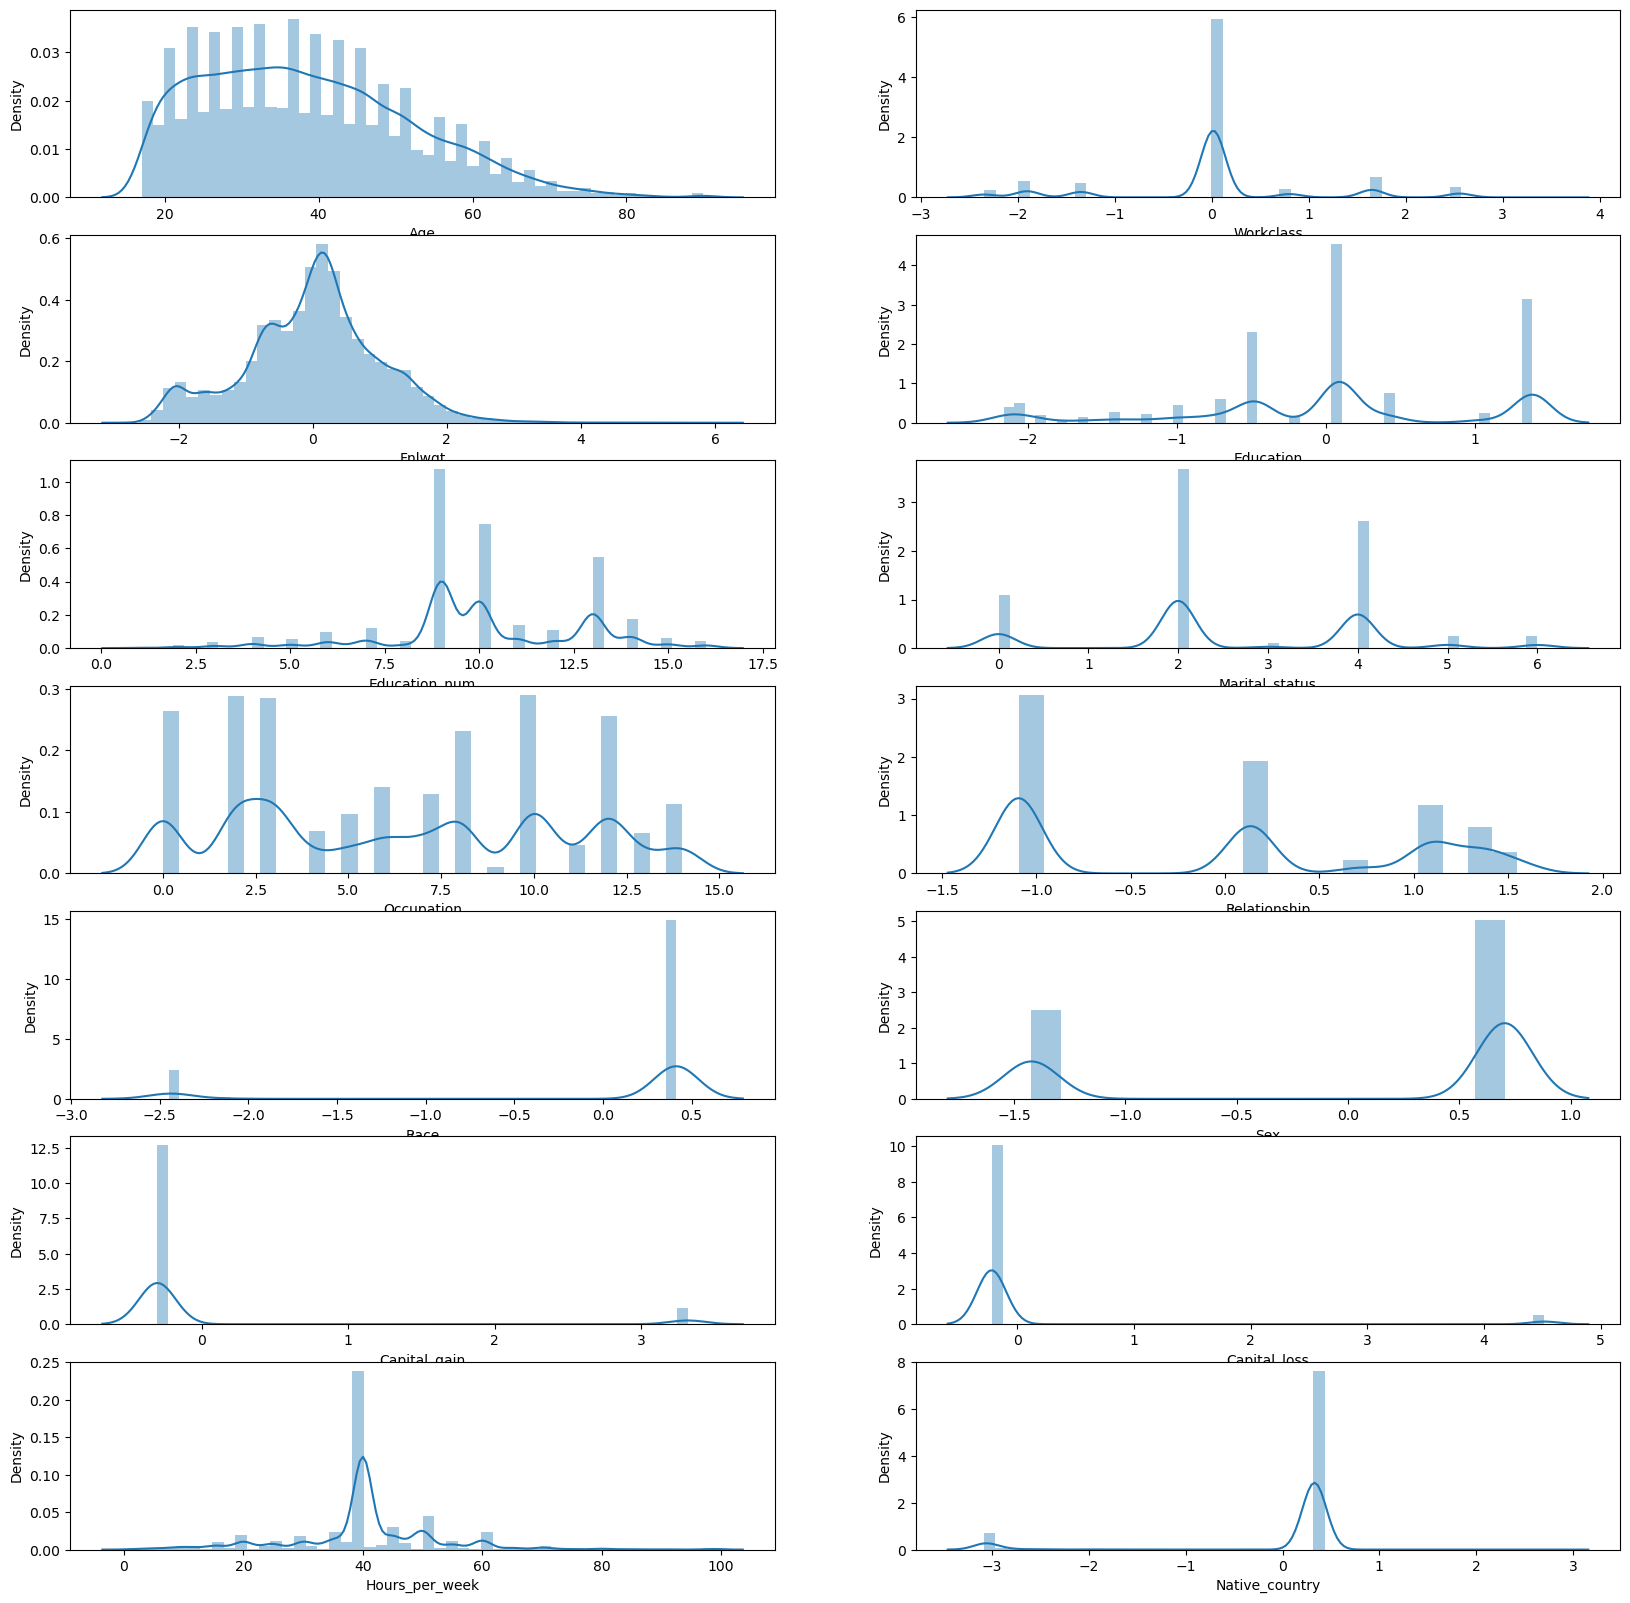

In [115]:
plt.figure(figsize=(20,20))
p=1
for i in censusdf:
    if p<=14:
        plt.subplot(7,2,p)
        sns.distplot(censusdf[i])
    p=p+1
plt.show()

# Check for the outliers in the dataset using seaborn boxplot

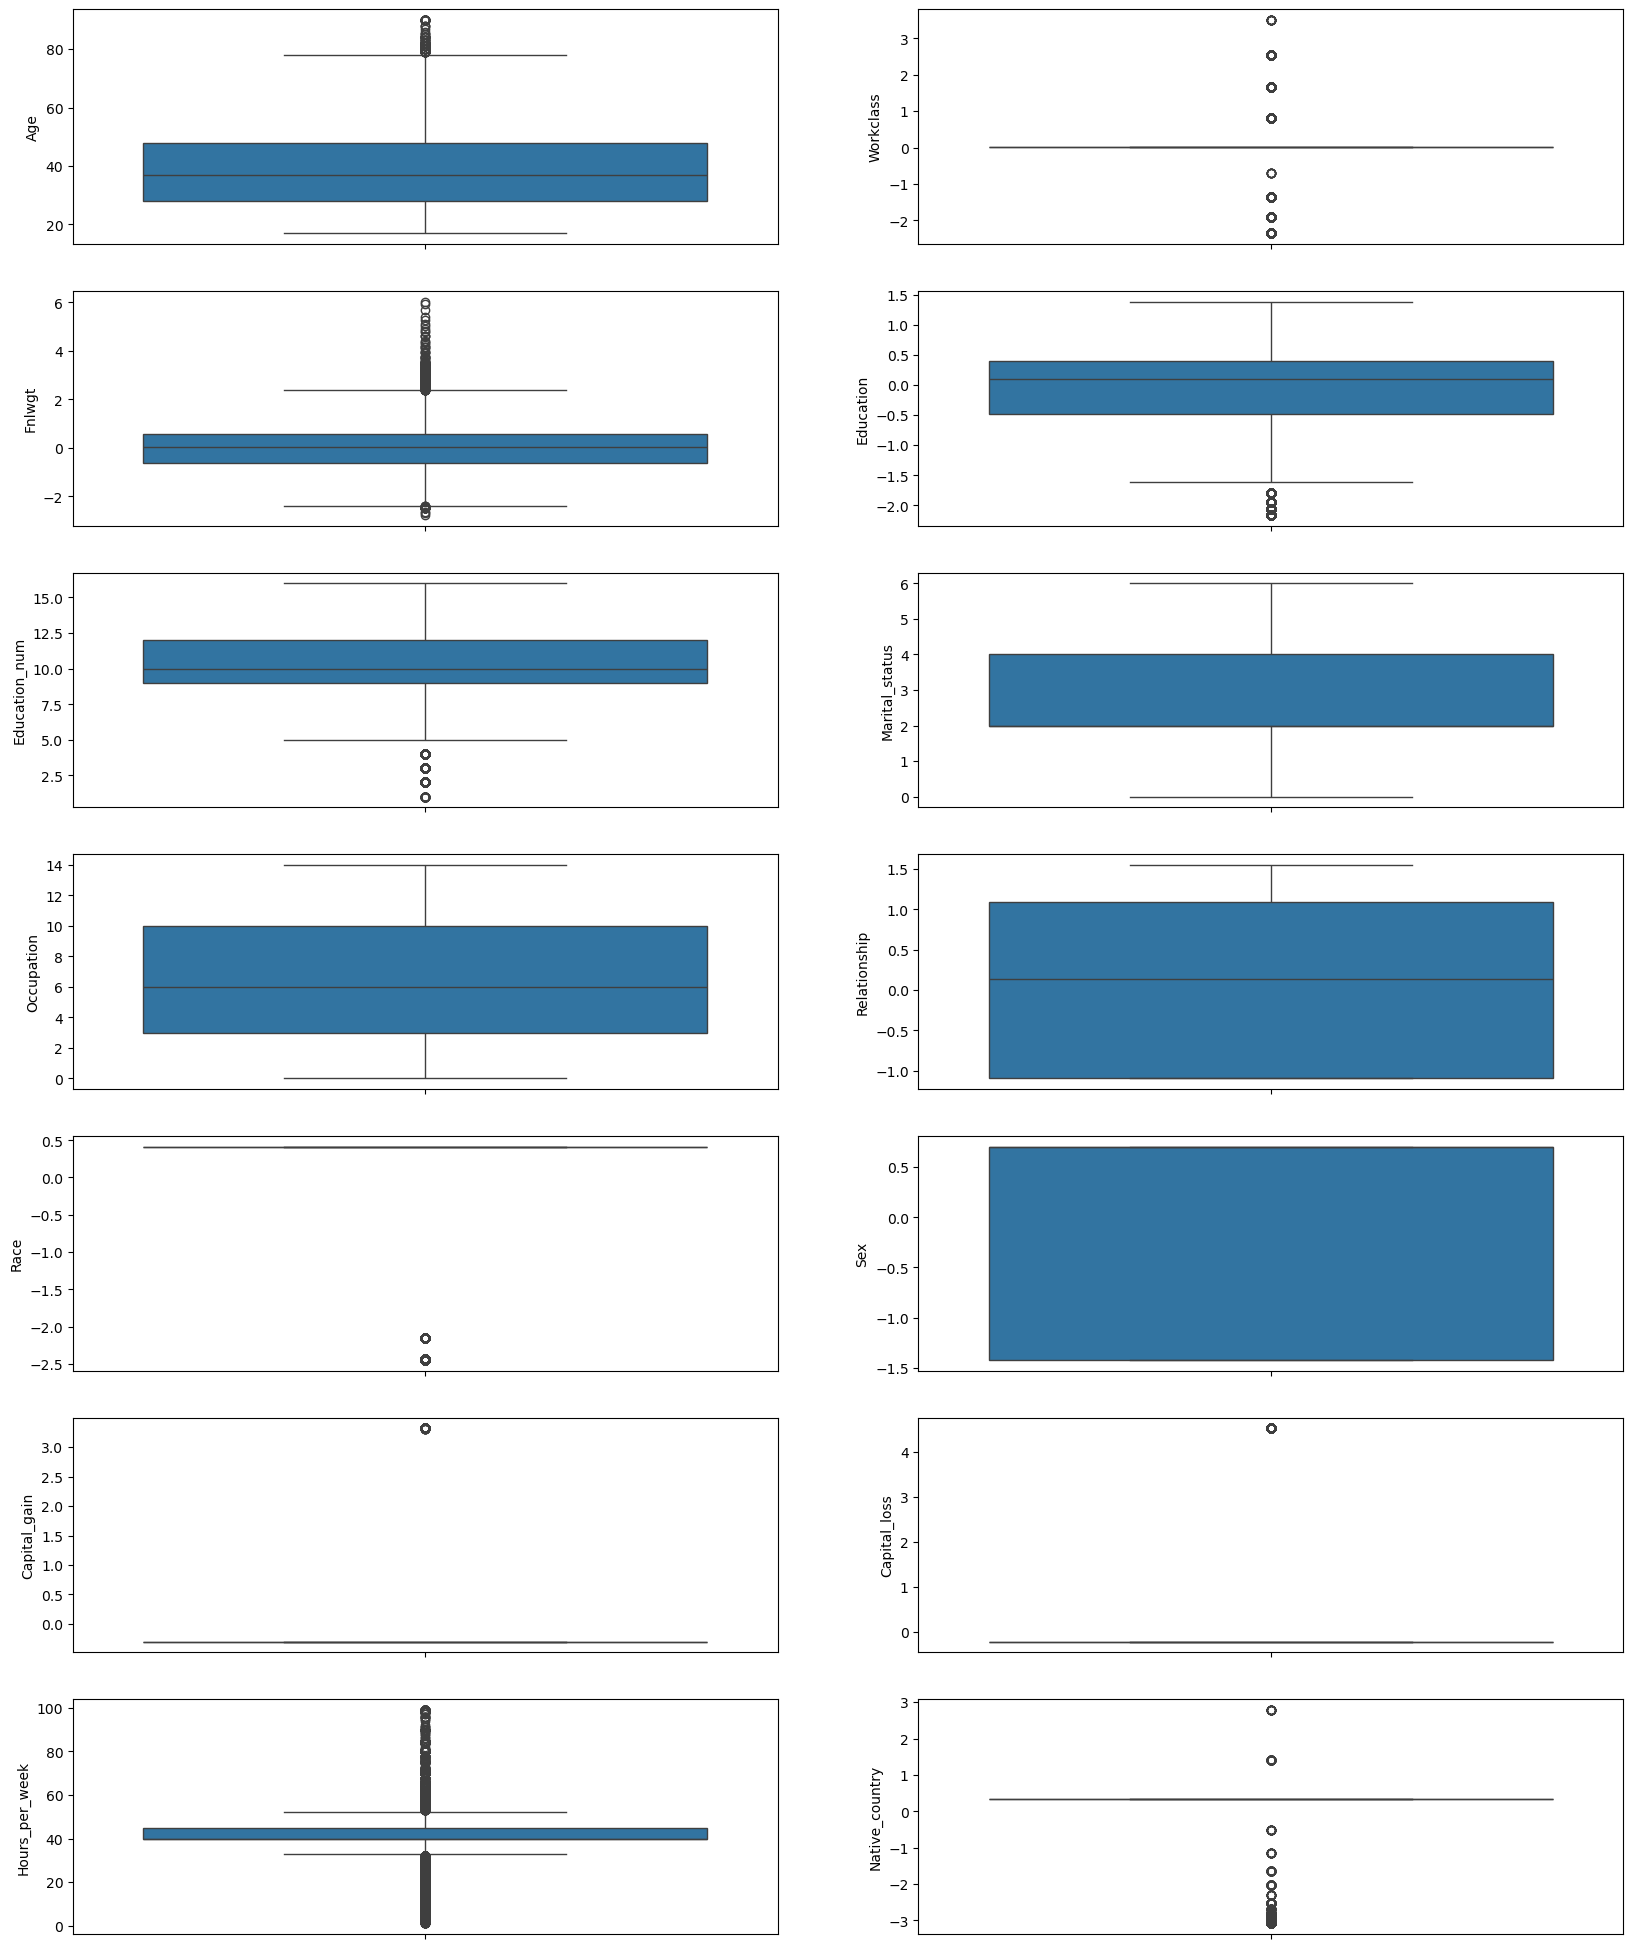

In [118]:
plt.figure(figsize=(20,25))
p=1
for i in censusdf:
    if p<=14:
        plt.subplot(7,2,p)
        sns.boxplot(censusdf[i])
    p=p+1
plt.show()

In [120]:
columns_for_outliers=['Age','Capital_gain','Hours_per_week']

# Detect and remove the outliers in the dataset using zscore

In [123]:
z=np.abs(zscore(censusdf[columns_for_outliers]))
z

Age  Capital_gain  Hours_per_week
0      0.836961      0.301491        2.222450
1      0.042934      0.301491        0.035664
2      1.056935      0.301491        0.035664
3      0.776180      0.301491        0.035664
4      0.116259      0.301491        0.035664
...         ...           ...             ...
32555  0.849505      0.301491        0.197648
32556  0.103715      0.301491        0.035664
32557  1.423558      0.301491        0.035664
32558  1.216128      0.301491        1.655506
32559  0.983611      3.316900        0.035664

[32536 rows x 3 columns]

In [125]:
np.where(z>=3)

(array([    7,     8,     9, ..., 32513, 32523, 32535], dtype=int64),
 array([1, 1, 2, ..., 1, 1, 1], dtype=int64))

In [127]:
census_df=censusdf[(z<3).all(axis=1)]
census_df.head()

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0   50   1.648812 -1.089960  -0.476830             13               2   
1   38   0.013189  0.398771   0.090708              9               0   
2   53   0.013189  0.562562  -2.067623              7               2   
3   28   0.013189  1.340353  -0.476830             13               2   
4   37   0.013189  0.957178   0.395380             14               2   

   Occupation  Relationship      Race       Sex  Capital_gain  Capital_loss  \
0           3     -1.094450  0.412918  0.703036     -0.301491     -0.221299   
1           5      0.134548  0.412918  0.703036     -0.301491     -0.221299   
2           5     -1.094450 -2.431782  0.703036     -0.301491     -0.221299   
3          10      1.548769 -2.431782 -1.422403     -0.301491     -0.221299   
4           3      1.548769  0.412918 -1.422403     -0.301491     -0.221299   

   Hours_per_week  Native_country  Income  
0              13        0.329272       0  
1              40        0.329272       0  
2              40        0.329272       0  
3              40       -3.083424       0  
4              40        0.329272       0

In [129]:
censusdf.shape

(32536, 15)

In [131]:
census_df.shape

(29330, 15)

In [133]:
print("Percentage of data loss",((censusdf.shape[0]-census_df.shape[0])/censusdf.shape[0])*100)

Percentage of data loss 9.853700516351118


# Outliers are removed from the dataset

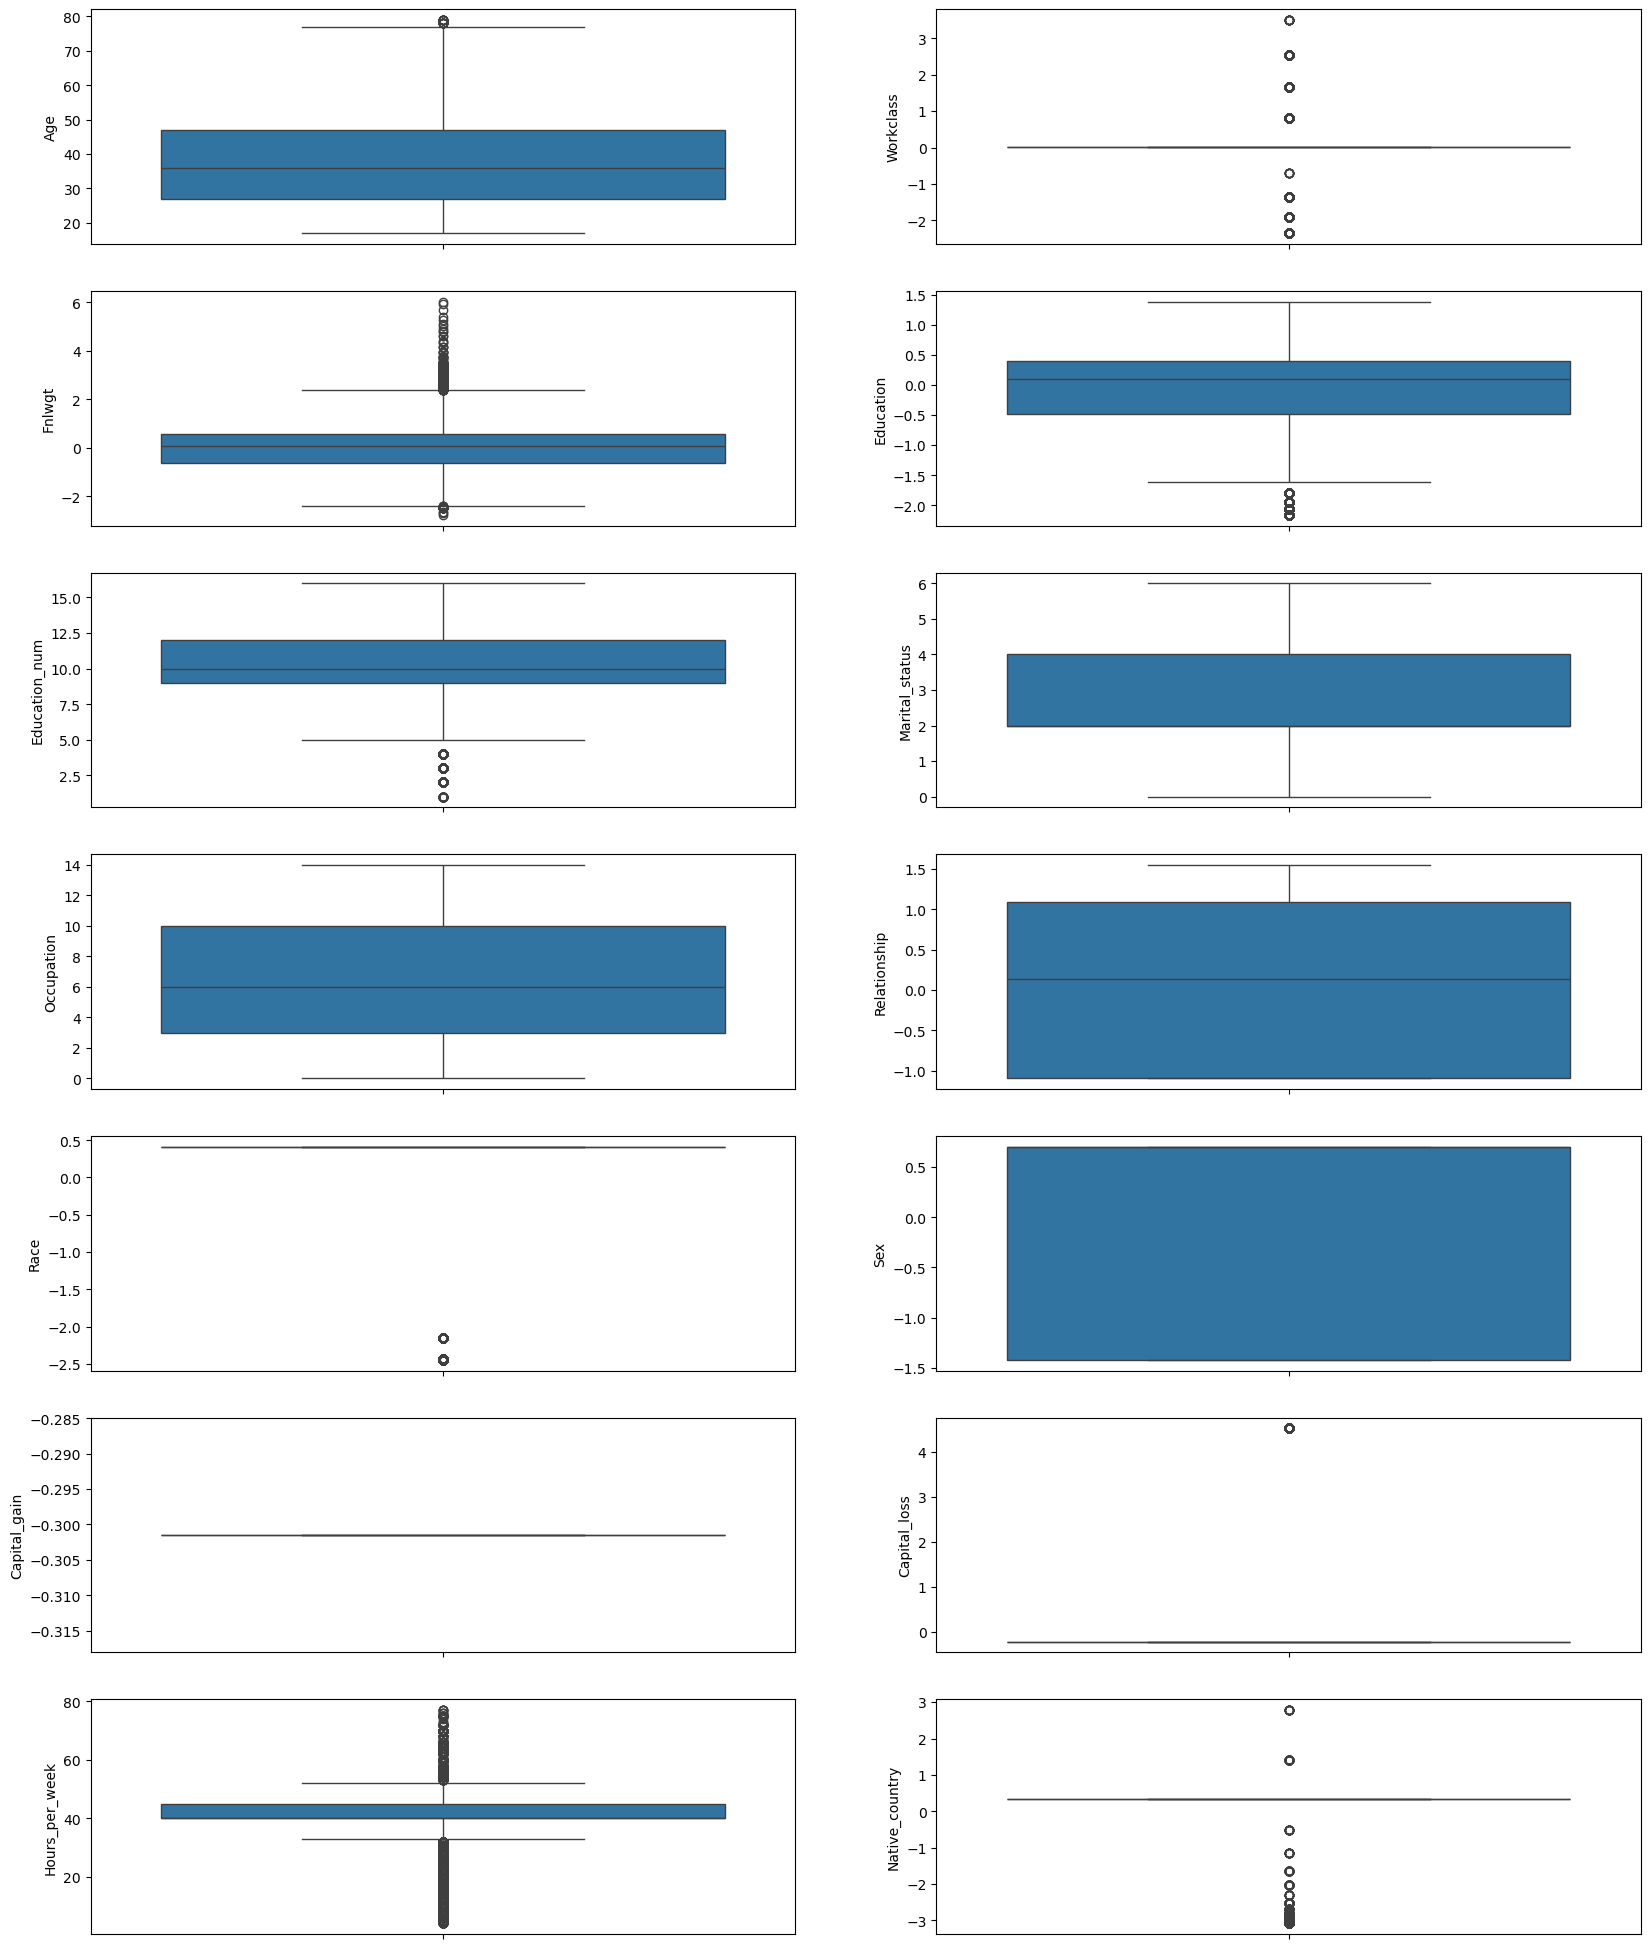

In [136]:
plt.figure(figsize=(20,25))
p=1
for i in census_df:
    if p<=14:
        plt.subplot(7,2,p)
        sns.boxplot(census_df[i])
    p=p+1
plt.show()

In [138]:
#drop the unneccessary columns in the dataset
census_df=census_df.drop(columns='Education_num',axis=1)

# Relationship between all the features in the dataset using seaborn pairplot

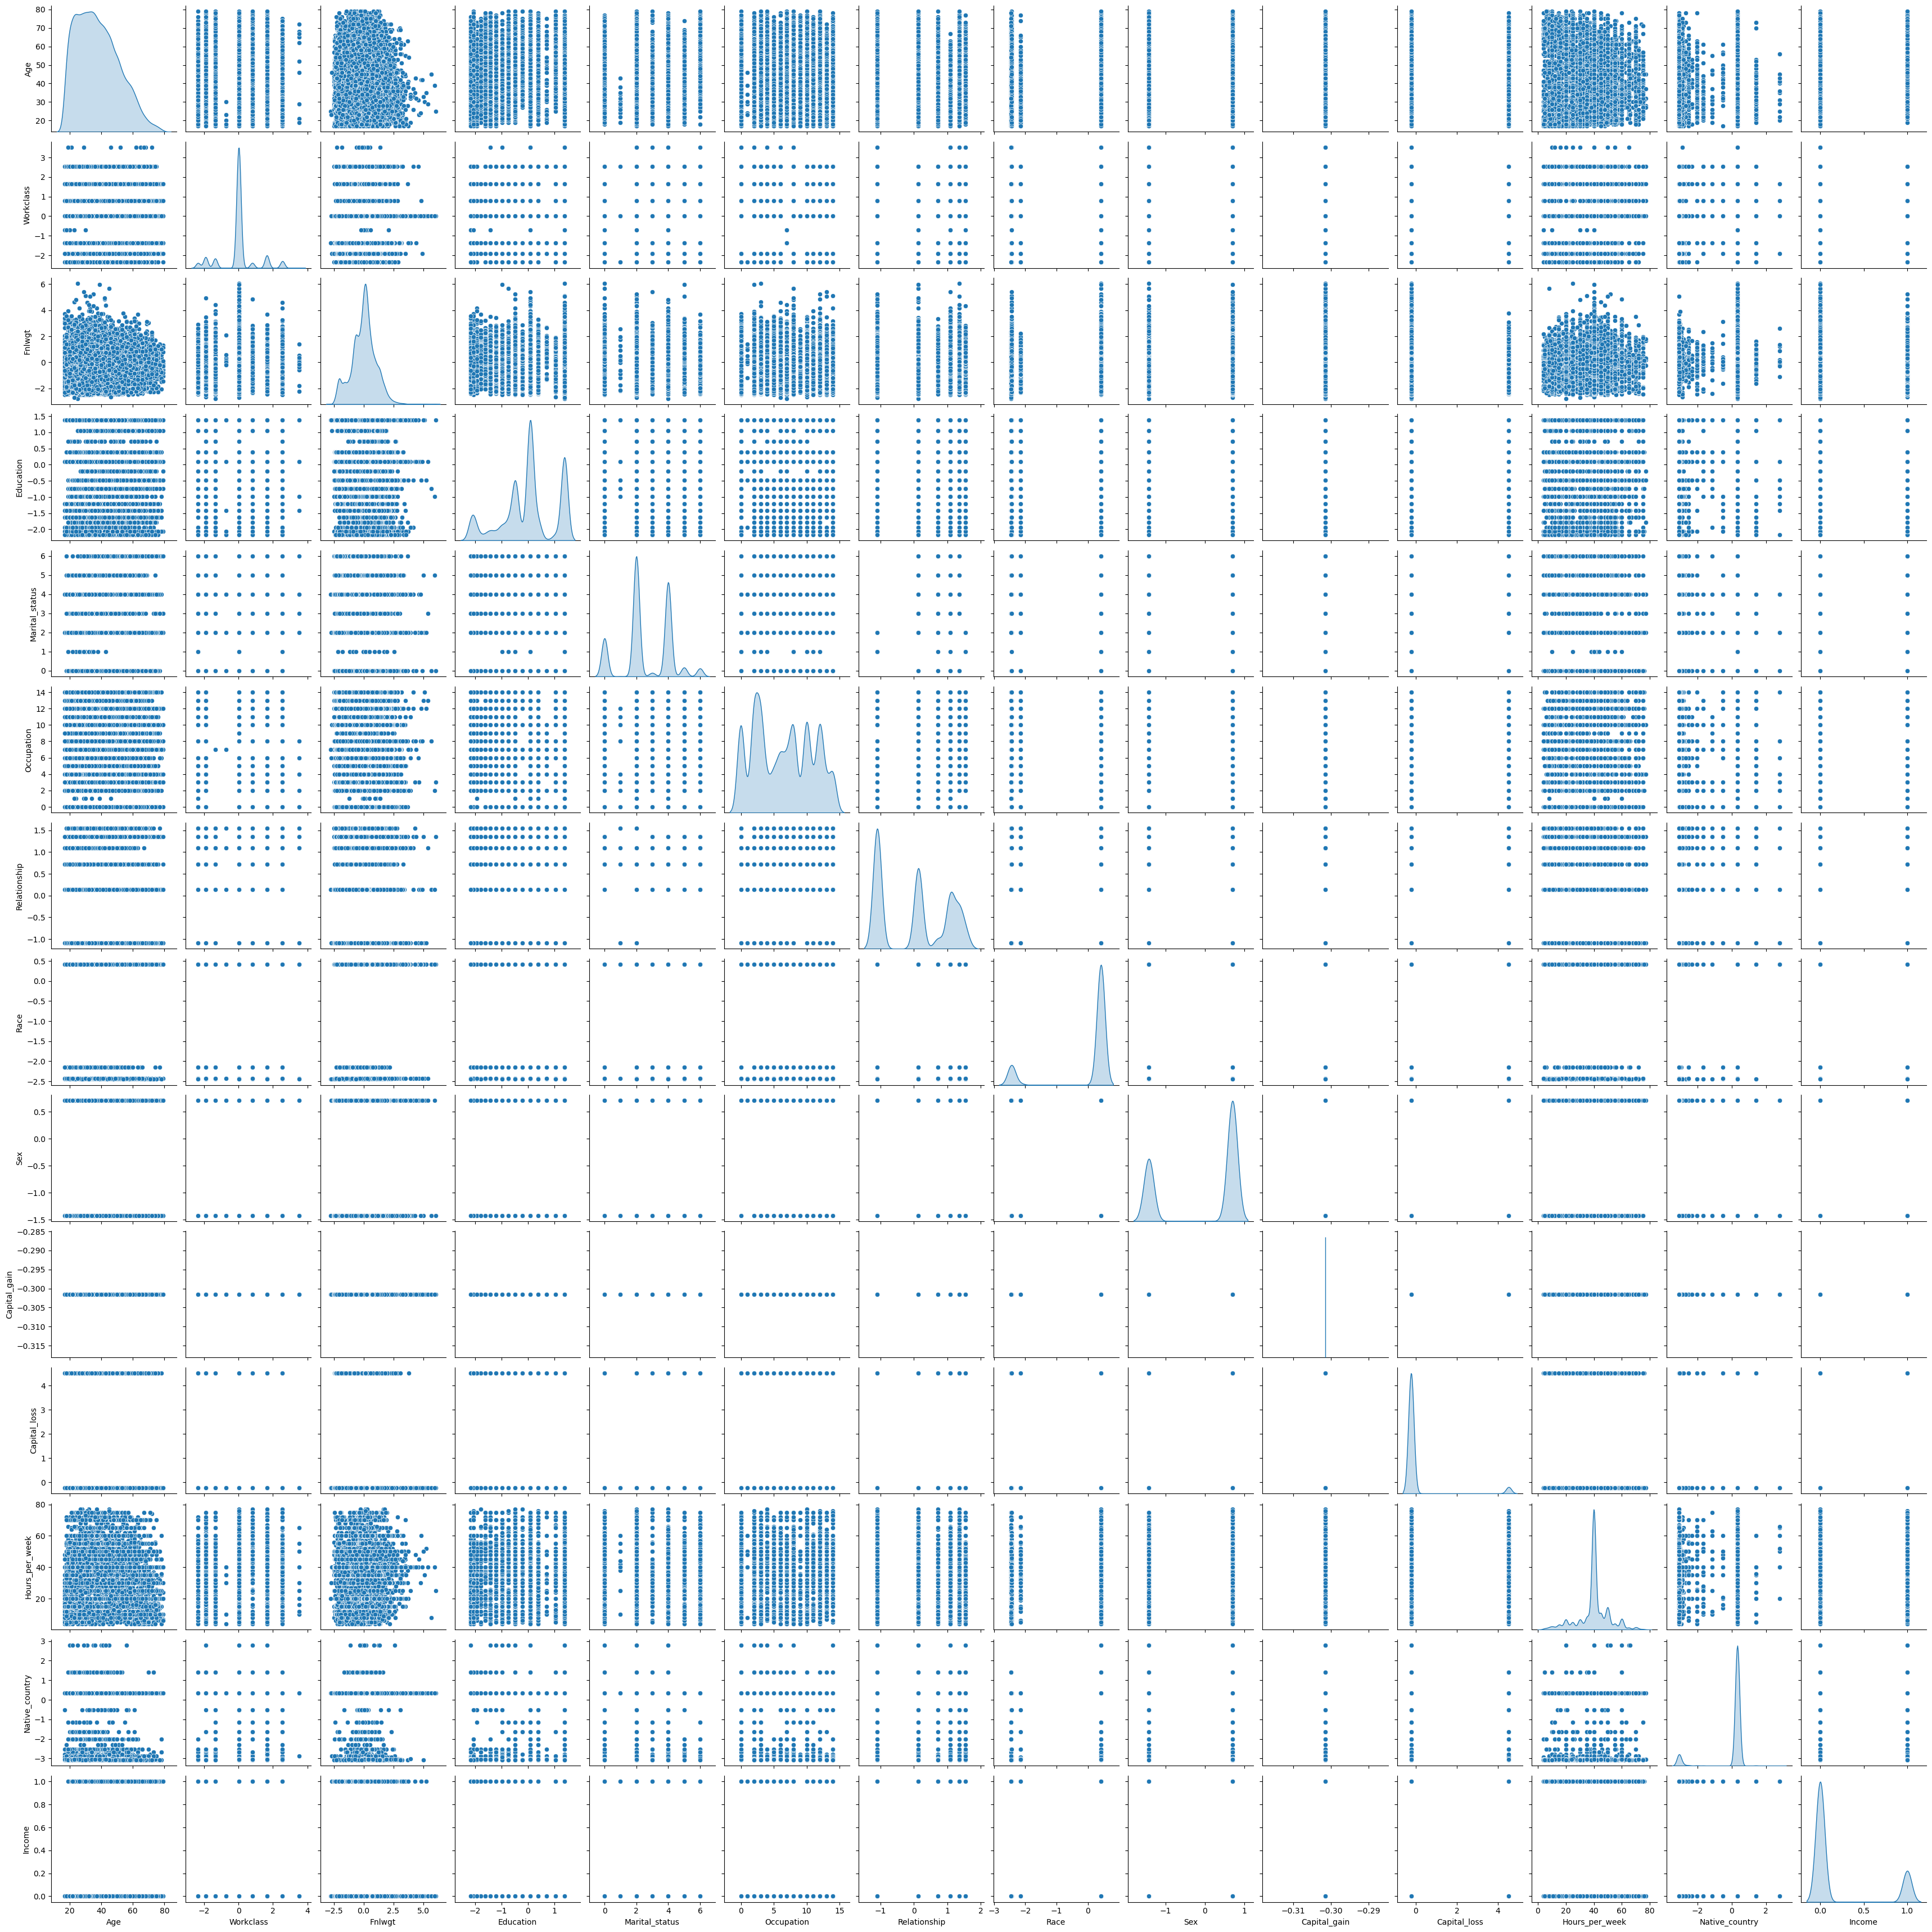

In [507]:
sns.pairplot(census_df,diag_kind='kde')

# Split the input data (x) and target/label (y)

In [141]:
x=census_df.drop(columns='Income',axis=1)
x.head()

Age  Workclass    Fnlwgt  Education  Marital_status  Occupation  \
0   50   1.648812 -1.089960  -0.476830               2           3   
1   38   0.013189  0.398771   0.090708               0           5   
2   53   0.013189  0.562562  -2.067623               2           5   
3   28   0.013189  1.340353  -0.476830               2          10   
4   37   0.013189  0.957178   0.395380               2           3   

   Relationship      Race       Sex  Capital_gain  Capital_loss  \
0     -1.094450  0.412918  0.703036     -0.301491     -0.221299   
1      0.134548  0.412918  0.703036     -0.301491     -0.221299   
2     -1.094450 -2.431782  0.703036     -0.301491     -0.221299   
3      1.548769 -2.431782 -1.422403     -0.301491     -0.221299   
4      1.548769  0.412918 -1.422403     -0.301491     -0.221299   

   Hours_per_week  Native_country  
0              13        0.329272  
1              40        0.329272  
2              40        0.329272  
3              40       -3.083424  
4              40        0.329272

In [143]:
y=census_df['Income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

# Check for multicollinearity in the dataset using variance inflation factor

In [146]:
def calc_vif(x):
    df=pd.DataFrame()
    df['Columns']=x.columns
    df['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [148]:
calc_vif(x)

Columns        VIF
0              Age   1.215096
1        Workclass   1.014160
2           Fnlwgt   1.016420
3        Education   1.016679
4   Marital_status   1.168023
5       Occupation   1.006071
6     Relationship   1.893251
7             Race   1.054231
8              Sex   1.614630
9     Capital_gain  35.718632
10    Capital_loss   1.010251
11  Hours_per_week   1.122894
12  Native_country   1.044108

In [150]:
x=x.drop(columns='Capital_gain',axis=1)

In [152]:
calc_vif(x)

Columns       VIF
0              Age  7.057511
1        Workclass  1.013659
2           Fnlwgt  1.014735
3        Education  1.016406
4   Marital_status  3.527244
5       Occupation  3.005966
6     Relationship  1.811486
7             Race  1.053494
8              Sex  1.615443
9     Capital_loss  1.008884
10  Hours_per_week  8.181611
11  Native_country  1.044036

# Check the total count of the Label data using pandas value_counts method

In [155]:
y.value_counts()

Income
0    23286
1     6044
Name: count, dtype: int64

The above output shows that the dataset is imbalanced.

# Balance the dataset using over sampling technique SMOTE

In [159]:
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x,y)

In [161]:
y_balanced.value_counts()

Income
0    23286
1    23286
Name: count, dtype: int64

# Apply RobustScaler technique to standardize the dataset

In [166]:
rbst=RobustScaler()
x_scales=rbst.fit_transform(x_balanced)
x_scaled=pd.DataFrame(x_scales,columns=x_balanced.columns)
x_scaled.head()

Age  Workclass    Fnlwgt  Education  Marital_status  Occupation  \
0  0.578947   1.635623 -1.029038  -0.650690             0.0   -0.428571   
1 -0.052632   0.000000  0.325797   0.000000            -1.0   -0.142857   
2  0.736842   0.000000  0.474857  -2.474553             0.0   -0.142857   
3 -0.578947   0.000000  1.182693  -0.650690             0.0    0.571429   
4 -0.105263   0.000000  0.833980   0.349310             0.0   -0.428571   

   Relationship    Race  Sex  Capital_loss  Hours_per_week  Native_country  
0      0.000000  0.0000  0.0           0.0          -3.375        0.000000  
1      0.676268  0.0000  0.0           0.0           0.000        0.000000  
2      0.000000 -2.8447  0.0           0.0           0.000        0.000000  
3      1.454457 -2.8447 -1.0           0.0           0.000       -3.412696  
4      1.454457  0.0000 -1.0           0.0           0.000        0.000000

# Model Setup

In [169]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bag=BaggingClassifier()
extra=ExtraTreesClassifier()

models=[("Logistic Regression",lg),
        ("DecisionTreeClassifier",dtc),
        ("RandomForestClassifier",rfc),
        ("SVC",svc),
        ("AdaBoostClassifier",ada),
        ("GradientBoostingClassifier",gbc),
        ("BaggingClassifier",bag),
        ("ExtraTreesClassifier",extra)]

# Apply cross validation technique to check for the best performing model and to avoid overfitting in the dataset

In [172]:
model_data=[lg,dtc,rfc,svc,ada,gbc,bag,extra]
for i in model_data:
    cvs=cross_val_score(i,x_scaled,y_balanced,scoring='accuracy',cv=5,n_jobs=-1)
    print("Cross validation score for ",i,"is ",cvs,"and mean of the cross validation is ",np.mean(cvs))

Cross validation score for  LogisticRegression() is  [0.73301127 0.74771873 0.74919476 0.74447069 0.75016105] and mean of the cross validation is  0.7449113006226032
Cross validation score for  DecisionTreeClassifier() is  [0.71916264 0.85131508 0.89005798 0.89456732 0.88941379] and mean of the cross validation is  0.8489033610108632
Cross validation score for  RandomForestClassifier() is  [0.78024691 0.89511541 0.92978312 0.93107151 0.93107151] and mean of the cross validation is  0.8934576903088074
Cross validation score for  SVC() is  [0.78690284 0.8143854  0.82660511 0.82295469 0.82628301] and mean of the cross validation is  0.8154262124061677
Cross validation score for  AdaBoostClassifier() is  [0.77681159 0.8589372  0.8803951  0.88114666 0.88136139] and mean of the cross validation is  0.8557303897618151
Cross validation score for  GradientBoostingClassifier() is  [0.77015566 0.86838433 0.89778828 0.89660726 0.89768091] and mean of the cross validation is  0.8661232866654658
Cro

# Split the data into train data and test data 

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_balanced,test_size=0.30,random_state=45)

In [177]:
x_train.shape

(32600, 12)

In [179]:
x_test.shape

(13972, 12)

In [181]:
y_train.shape

(32600,)

In [183]:
y_test.shape

(13972,)

# Build and train the ML model

In [186]:
models_values=[]
for model_name, model in models:
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    y_predict_train=model.predict(x_train)
    rscore=r2_score(y_test,y_predict)
    accuracy=accuracy_score(y_test,y_predict)
    rscore_train=r2_score(y_train,y_predict_train)
    precision=precision_score(y_test,y_predict)
    recall=recall_score(y_test,y_predict)
    dict={"Model_Name":model_name,"R-Score(Training data)":rscore_train,"R-Score(Test data)":rscore,"Accuracy Score":accuracy,"Precision Score":precision,"Recall score":recall}
    models_values.append(dict)
df=pd.DataFrame(models_values)
df=df.sort_values(by="Accuracy Score",ascending=False)
df

Model_Name  R-Score(Training data)  R-Score(Test data)  \
7        ExtraTreesClassifier                1.000000            0.613492   
2      RandomForestClassifier                1.000000            0.596028   
6           BaggingClassifier                0.966871            0.502407   
5  GradientBoostingClassifier                0.508830            0.496395   
1      DecisionTreeClassifier                1.000000            0.431118   
4          AdaBoostClassifier                0.443062            0.428827   
3                         SVC                0.290668            0.261341   
0         Logistic Regression               -0.015715           -0.036414   

   Accuracy Score  Precision Score  Recall score  
7        0.903378         0.886719      0.923288  
2        0.899012         0.890334      0.908435  
6        0.875608         0.883996      0.862581  
5        0.874105         0.859345      0.892430  
1        0.857787         0.852121      0.863302  
4        0.857214         0.837063      0.884499  
3        0.815345         0.766687      0.902668  
0        0.740910         0.705824      0.819611

# Hyperparameter tuning for RandomForestClassifier

In [187]:
param_grids={"criterion":["gini", "entropy", "log_loss"],"max_features":["sqrt", "log2", None],"class_weight":["balanced", "balanced_subsample"]}

In [189]:
param_grids

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'class_weight': ['balanced', 'balanced_subsample']}

In [191]:
gscv=GridSearchCV(rfc,param_grids,scoring='accuracy',n_jobs=-1,cv=5)

In [193]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [195]:
gscv.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'log2'}

In [199]:
rfc1=RandomForestClassifier(criterion='entropy',max_features='log2',class_weight='balanced_subsample')
rfc1.fit(x_train,y_train)
y_predicts_train=rfc1.predict(x_train)
y_predicts=rfc1.predict(x_test)
print("R-Score for training data",r2_score(y_train,y_predicts_train))
print("R-Score",r2_score(y_test,y_predicts))
print("Accuracy Score",accuracy_score(y_test,y_predicts))
print("Precision Score",precision_score(y_test,y_predicts))
print("Recall Score",recall_score(y_test,y_predicts))

R-Score for training data 1.0
R-Score 0.5871523461477028
Accuracy Score 0.8967935871743486
Precision Score 0.890738369611609
Recall Score 0.9028118240807498


# Hyperparameter tuning for ExtraTreesClassifier

In [202]:
param_grids1={"criterion":["gini", "entropy", "log_loss"],"max_features":["sqrt", "log2", None],"class_weight":["balanced", "balanced_subsample"]}

In [204]:
param_grids1

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'class_weight': ['balanced', 'balanced_subsample']}

In [210]:
gscv=GridSearchCV(extra,param_grids1,scoring='accuracy',n_jobs=-1,cv=5)

In [212]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [214]:
gscv.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'log_loss',
 'max_features': 'sqrt'}

In [216]:
extra1=ExtraTreesClassifier(criterion='log_loss',max_features='sqrt',class_weight='balanced_subsample')
extra1.fit(x_train,y_train)
y_predicts_train_extra=extra1.predict(x_train)
y_predicts_extra=extra1.predict(x_test)
print("R-Score for training data",r2_score(y_train,y_predicts_train_extra))
print("R-Score",r2_score(y_test,y_predicts_extra))
print("Accuracy Score",accuracy_score(y_test,y_predicts_extra))
print("Precision Score",precision_score(y_test,y_predicts_extra))
print("Recall Score",recall_score(y_test,y_predicts_extra))

R-Score for training data 1.0
R-Score 0.6054756816862237
Accuracy Score 0.9013741769252791
Precision Score 0.886278326150424
Recall Score 0.9192501802451334


# ROC curve

In [219]:
fpr,tpr,threshold=roc_curve(y_test,y_predicts_extra)

In [221]:
fpr

array([0.        , 0.11624272, 1.        ])

In [223]:
tpr

array([0.        , 0.91925018, 1.        ])

In [225]:
threshold

array([inf,  1.,  0.])

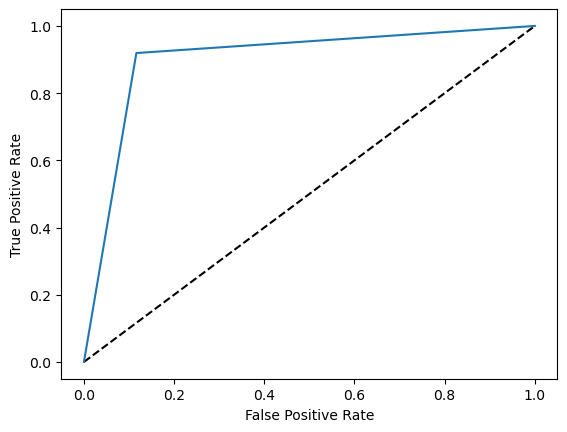

In [227]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Extra Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [231]:
auc_score=roc_auc_score(y_test,y_predicts_extra)
auc_score

0.9015037315891008

In [233]:
auc(fpr,tpr)

0.9015037315891008

# Save the best model

In [240]:
import pickle

filename='CensusIncome.pkl'
pickle.dump(extra1,open(filename,'wb'))

# Load and test the model

In [243]:
import pickle
model=pickle.load(open('CensusIncome.pkl','rb'))
model.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [245]:
y_test1=np.array(y_test)
df=pd.DataFrame()
df["Actual Output"]=y_test1
df["Predicted Output"]=y_predicts_extra
df

Actual Output  Predicted Output
0                  1                 1
1                  1                 1
2                  0                 0
3                  1                 1
4                  1                 1
...              ...               ...
13967              0                 0
13968              1                 1
13969              1                 1
13970              0                 0
13971              0                 0

[13972 rows x 2 columns]

# Relationship between actual output and predicted output using lineplot

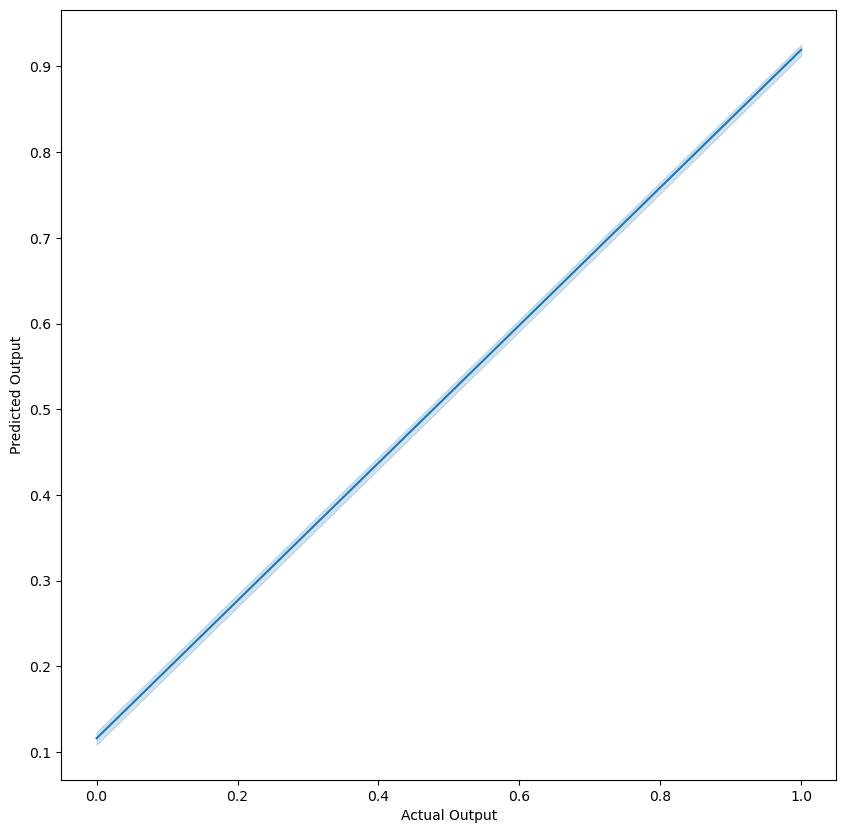

In [265]:
plt.figure(figsize=(10,10))
sns.lineplot(df,x=y_test1,y=y_predicts_extra)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The output from the lineplot shows that increase in the actual output that increases the predicted output value means the extra tree classifier model perform well compared to other model.